In [159]:
import os
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,12)

pd.options.mode.chained_assignment = None

In [160]:
df = pd.read_csv('owid-covid-data.csv')


In [161]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [322]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259632,ZWE,Africa,Zimbabwe,2023-02-19,263642.0,0.0,79.857,5662.0,0.0,0.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
259633,ZWE,Africa,Zimbabwe,2023-02-20,263642.0,0.0,79.857,5662.0,0.0,0.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
259634,ZWE,Africa,Zimbabwe,2023-02-21,263642.0,0.0,79.857,5662.0,0.0,0.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
259635,ZWE,Africa,Zimbabwe,2023-02-22,263921.0,279.0,39.857,5663.0,1.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259637 entries, 0 to 259636
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    259637 non-null  object        
 1   continent                                   245066 non-null  object        
 2   location                                    259637 non-null  object        
 3   date                                        259637 non-null  datetime64[ns]
 4   total_cases                                 245103 non-null  float64       
 5   new_cases                                   244839 non-null  float64       
 6   new_cases_smoothed                          243635 non-null  float64       
 7   total_deaths                                225414 non-null  float64       
 8   new_deaths                                  225336 non-null  float64      

In [187]:
df.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Year,Month
count,2.451030e+05,2.448390e+05,2.436350e+05,2.254140e+05,225336.000000,224150.000000,243990.000000,243726.000000,242527.000000,224314.000000,...,186040.000000,238303.000000,203958.000000,2.585240e+05,8.649000e+03,8649.000000,8649.000000,8649.000000,259637.000000,259637.000000
mean,5.324724e+06,1.174876e+04,1.179501e+04,8.010367e+04,126.648671,127.209934,74129.933271,177.214792,177.793862,755.539342,...,3.089125,73.597060,0.724529,1.405162e+08,5.273396e+04,10.335603,14.090851,1514.390390,2021.172656,6.548466
std,3.271806e+07,8.188742e+04,7.960481e+04,4.079671e+05,735.662848,681.925771,124831.747066,1124.971457,665.976913,1031.179430,...,2.551417,7.446413,0.149553,6.916194e+08,1.433321e+05,13.192857,25.875053,1856.830173,0.881317,3.454226
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281600,2020.000000,1.000000
25%,5.801500e+03,0.000000e+00,4.429000e+00,1.250000e+02,0.000000,0.000000,1387.598000,0.000000,0.909000,34.686000,...,1.300000,69.500000,0.602000,8.367830e+05,9.320001e+01,1.080000,0.190000,56.186893,2020.000000,4.000000
50%,6.235000e+04,3.700000e+01,7.671400e+01,1.361000e+03,0.000000,1.143000,14013.625000,4.675000,15.889000,251.422500,...,2.500000,75.050000,0.742000,6.948395e+06,7.149899e+03,8.010000,7.620000,944.000850,2021.000000,7.000000
75%,6.473960e+05,8.160000e+02,9.958570e+02,1.104300e+04,11.000000,13.286000,88264.952500,83.366500,122.303000,1141.533500,...,4.200000,79.070000,0.838000,3.369661e+07,3.811930e+04,16.310000,19.230000,2428.449000,2022.000000,10.000000
max,6.746733e+08,4.082893e+06,3.436562e+06,6.868542e+06,60902.000000,14860.286000,722127.171000,228872.025000,36421.827000,6442.897000,...,13.800000,86.750000,0.957000,7.975105e+09,1.273323e+06,76.550000,376.770000,10251.770000,2023.000000,12.000000


In [188]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

iso_code - 0%
continent - 6%
location - 0%
date - 0%
total_cases - 6%
new_cases - 6%
new_cases_smoothed - 6%
total_deaths - 13%
new_deaths - 13%
new_deaths_smoothed - 14%
total_cases_per_million - 6%
new_cases_per_million - 6%
new_cases_smoothed_per_million - 7%
total_deaths_per_million - 14%
new_deaths_per_million - 14%
new_deaths_smoothed_per_million - 14%
reproduction_rate - 29%
icu_patients - 87%
icu_patients_per_million - 87%
hosp_patients - 85%
hosp_patients_per_million - 85%
weekly_icu_admissions - 97%
weekly_icu_admissions_per_million - 97%
weekly_hosp_admissions - 92%
weekly_hosp_admissions_per_million - 92%
total_tests - 69%
new_tests - 71%
total_tests_per_thousand - 69%
new_tests_per_thousand - 71%
new_tests_smoothed - 60%
new_tests_smoothed_per_thousand - 60%
positive_rate - 63%
tests_per_case - 64%
tests_units - 59%
total_vaccinations - 72%
people_vaccinated - 73%
people_fully_vaccinated - 74%
total_boosters - 84%
new_vaccinations - 77%
new_vaccinations_smoothed - 40%
tota

In [189]:
df = df.fillna(0)

In [190]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


iso_code - 0%
continent - 0%
location - 0%
date - 0%
total_cases - 0%
new_cases - 0%
new_cases_smoothed - 0%
total_deaths - 0%
new_deaths - 0%
new_deaths_smoothed - 0%
total_cases_per_million - 0%
new_cases_per_million - 0%
new_cases_smoothed_per_million - 0%
total_deaths_per_million - 0%
new_deaths_per_million - 0%
new_deaths_smoothed_per_million - 0%
reproduction_rate - 0%
icu_patients - 0%
icu_patients_per_million - 0%
hosp_patients - 0%
hosp_patients_per_million - 0%
weekly_icu_admissions - 0%
weekly_icu_admissions_per_million - 0%
weekly_hosp_admissions - 0%
weekly_hosp_admissions_per_million - 0%
total_tests - 0%
new_tests - 0%
total_tests_per_thousand - 0%
new_tests_per_thousand - 0%
new_tests_smoothed - 0%
new_tests_smoothed_per_thousand - 0%
positive_rate - 0%
tests_per_case - 0%
tests_units - 0%
total_vaccinations - 0%
people_vaccinated - 0%
people_fully_vaccinated - 0%
total_boosters - 0%
new_vaccinations - 0%
new_vaccinations_smoothed - 0%
total_vaccinations_per_hundred - 0

In [328]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [178]:
df['continent'] = df['continent'].replace({'Oceania':'Australia'})

In [179]:
continent_names = df.continent.value_counts().index
continent_val = df.continent.value_counts().values

In [180]:
continent_names

Index(['Europe', 'Africa', 'Asia', 'North America', 'Australia', 0,
       'South America'],
      dtype='object')

#### Australia comprises the data of Aus, New Zealand, Papus New Guinea etc and other small islands in that region

In [181]:
continent_val

array([59393, 58943, 55086, 39009, 18503, 14571, 14132], dtype=int64)

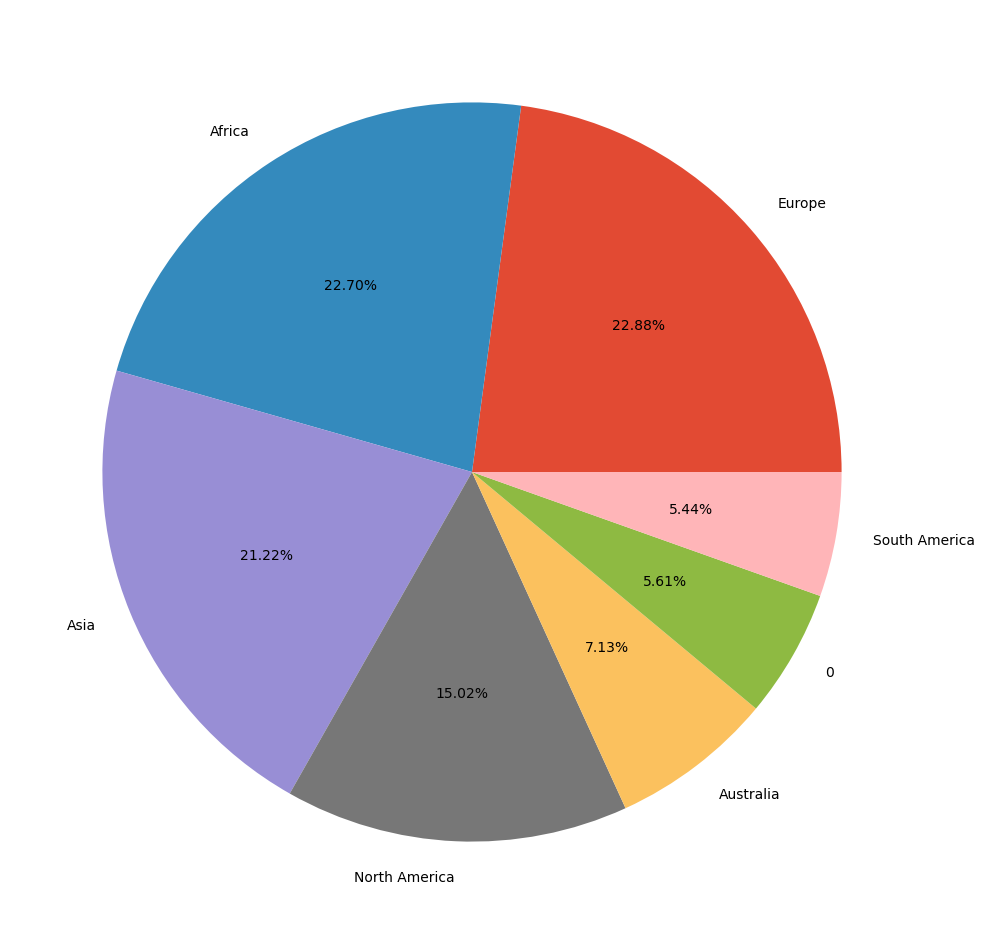

In [182]:
plt.pie(continent_val, labels = continent_names,autopct = '%1.2f%%' )
plt.show()

The above pie chart shows the continent with highest cases in which Europe has the highest percentage

In [169]:
df['date'] = pd.to_datetime(df['date'])

In [170]:
df.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
259632   2023-02-19
259633   2023-02-20
259634   2023-02-21
259635   2023-02-22
259636   2023-02-23
Name: date, Length: 259637, dtype: datetime64[ns]

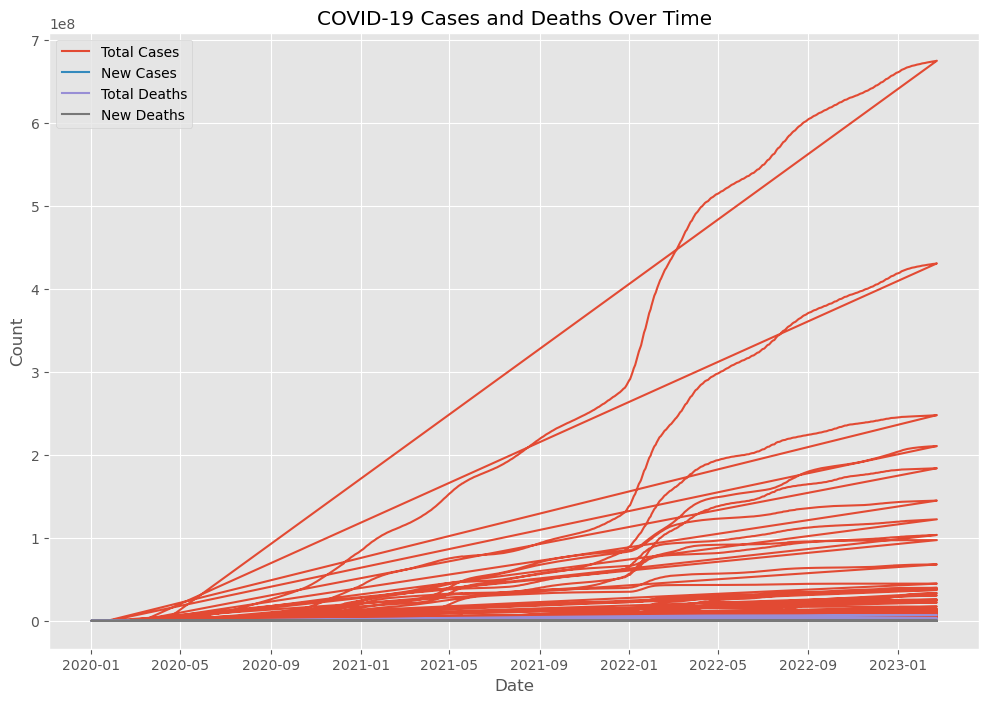

In [185]:
df['date'] = pd.to_datetime(df['date'])

# Create line plots of total_cases, new_cases, total_deaths, and new_deaths against date
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['total_cases'], label='Total Cases')
plt.plot(df['date'], df['new_cases'], label='New Cases')
plt.plot(df['date'], df['total_deaths'], label='Total Deaths')
plt.plot(df['date'], df['new_deaths'], label='New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Time')
plt.legend()
plt.show()

In this abive code, we first load the data into a DataFrame using read_csv() method. Then, we convert the date column to a datetime format using pd.to_datetime(). Finally, we create line plots of total_cases, new_cases, total_deaths, and new_deaths against date using plt.plot() method from matplotlib. We set the labels for the x-axis and y-axis using plt.xlabel() and plt.ylabel(), respectively. We also set a title for the plot using plt.title() and display the legend using plt.legend(). Finally, we show the plot using plt.show().

This code will generate a line plot that shows how the number of cases and deaths has changed over time. You can modify this code to create line plots of other columns against date as well

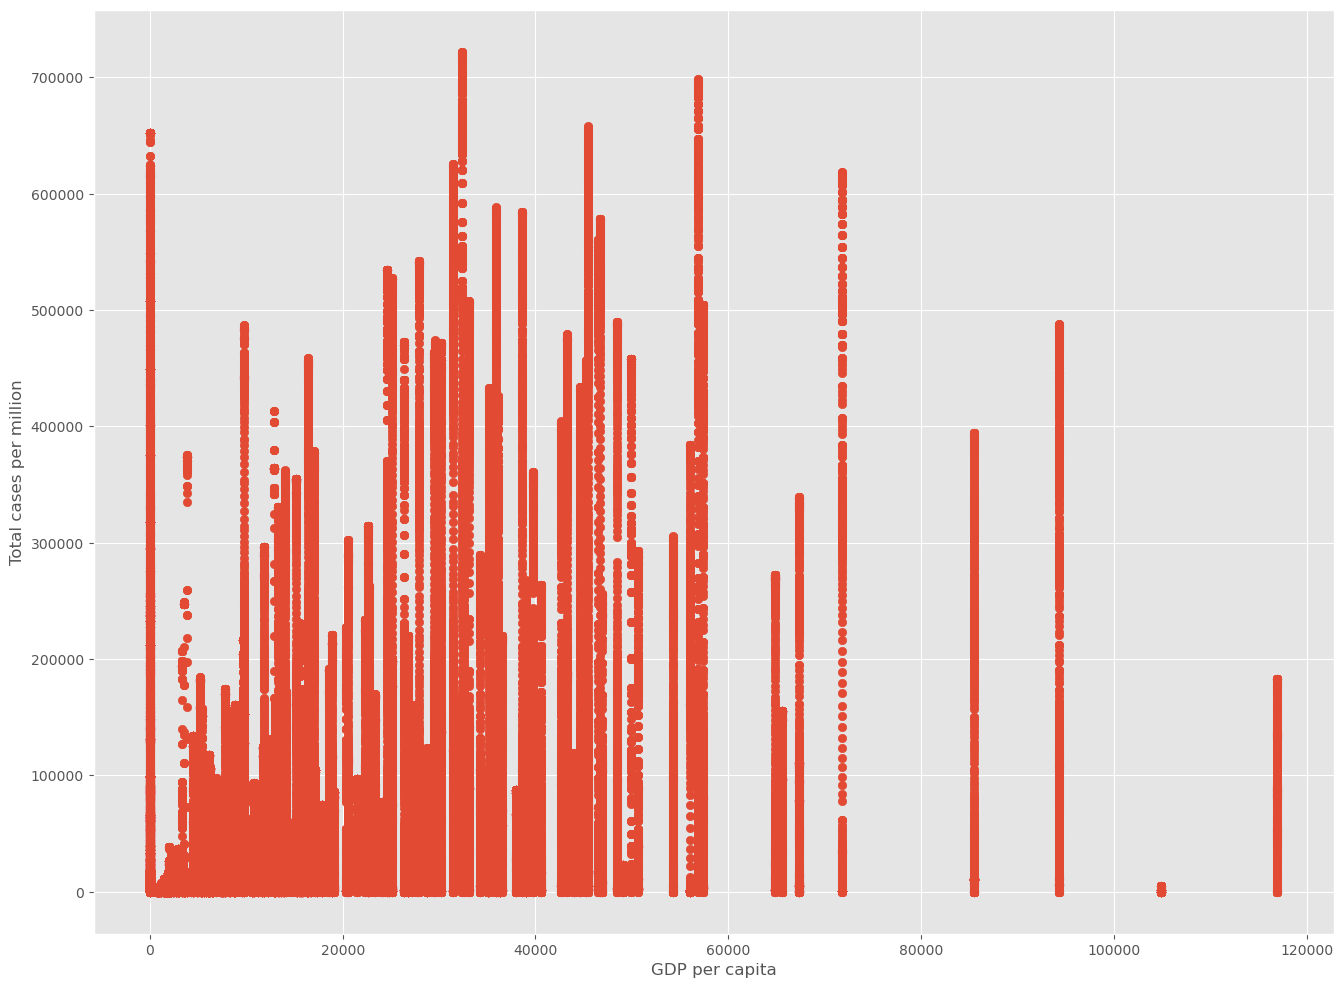

In [186]:
plt.scatter(df['gdp_per_capita'], df['total_cases_per_million'])
plt.xlabel('GDP per capita')
plt.ylabel('Total cases per million')
plt.show()

The above graph is a scatter plot where the x-axis represents GDP per capita and the y-axis represents total cases per million. Each point on the plot represents a country and the location of the point is determined by the value of its GDP per capita and total cases per million. You can use this plot to explore whether there is a relationship between a country's wealth and its number of COVID-19 cases. If the points are clustered around a line that slopes upwards from left to right, it suggests a positive correlation between the two variables. If the points are scattered without a clear pattern, it suggests that there is no significant relationship between the two variables.

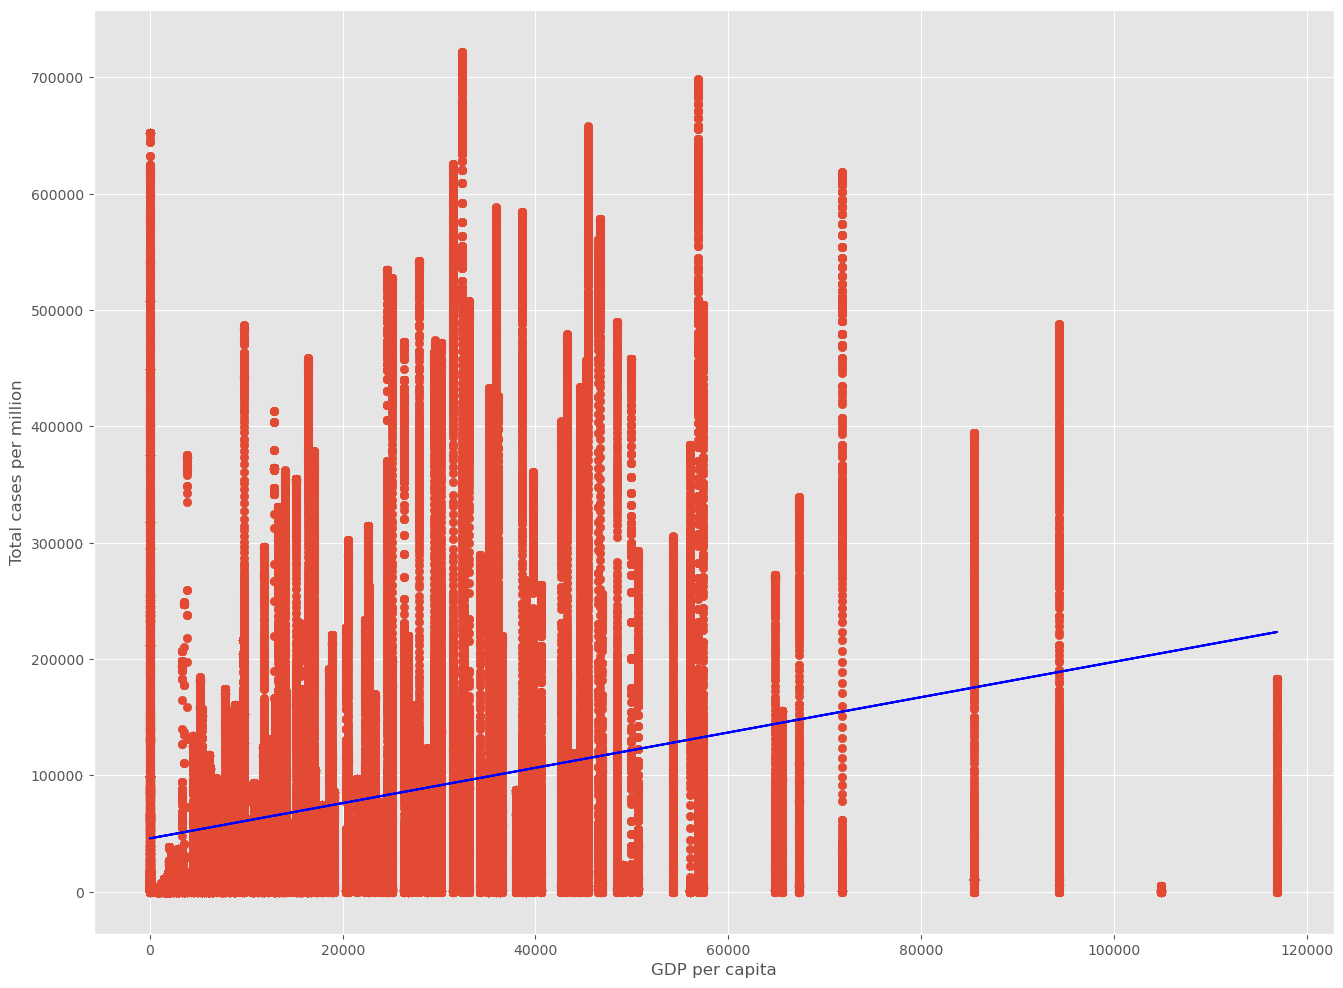

In [187]:
plt.scatter(df['gdp_per_capita'], df['total_cases_per_million'])
plt.xlabel('GDP per capita')
plt.ylabel('Total cases per million')

# Calculate and plot trendline
m, b = np.polyfit(df['gdp_per_capita'], df['total_cases_per_million'], 1)
plt.plot(df['gdp_per_capita'], m * df['gdp_per_capita'] + b, color='blue')

# Show plot
plt.show()

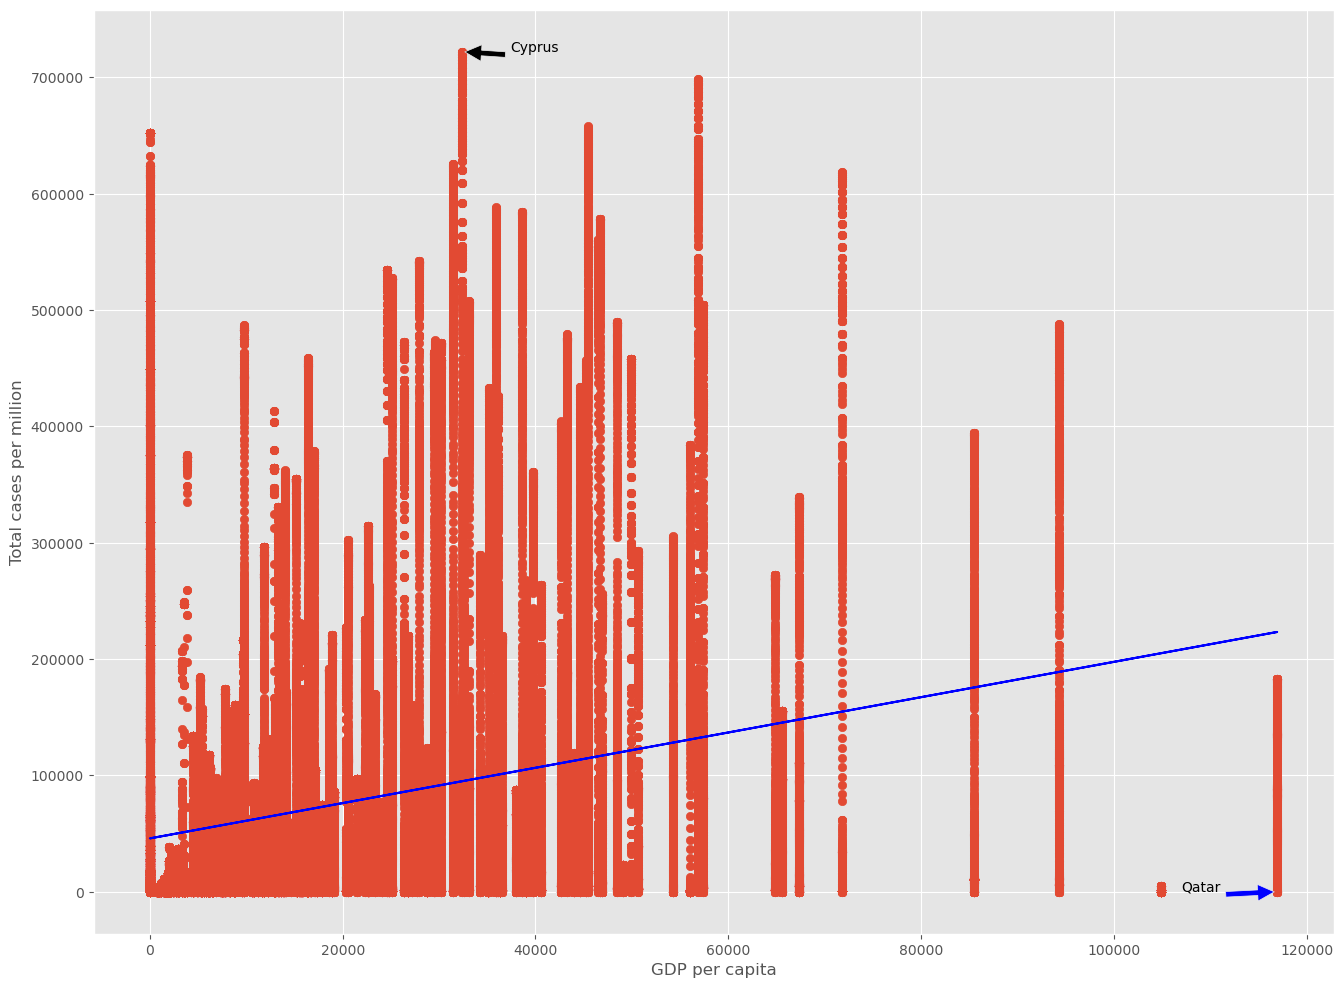

In [188]:
plt.scatter(df['gdp_per_capita'], df['total_cases_per_million'])
plt.xlabel('GDP per capita')
plt.ylabel('Total cases per million')

# Annotate the country with the highest GDP per capita
max_gdp = df.loc[df['gdp_per_capita'].idxmax()]
plt.annotate(max_gdp['location'], 
             xy=(max_gdp['gdp_per_capita'], max_gdp['total_cases_per_million']),
             xytext=(max_gdp['gdp_per_capita'] - 10000, max_gdp['total_cases_per_million'] + 100),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Annotate the country with the highest total cases per million
max_cases = df.loc[df['total_cases_per_million'].idxmax()]
plt.annotate(max_cases['location'], 
             xy=(max_cases['gdp_per_capita'], max_cases['total_cases_per_million']),
             xytext=(max_cases['gdp_per_capita'] + 5000, max_cases['total_cases_per_million'] - 200),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Calculate and plot trendline
m, b = np.polyfit(df['gdp_per_capita'], df['total_cases_per_million'], 1)
trendline = m * df['gdp_per_capita'] + b
plt.plot(df['gdp_per_capita'], trendline, color='blue')

# Show plot
plt.show()

The above graph is for the country with the highest GDP per capita and the country with the highest total cases per million

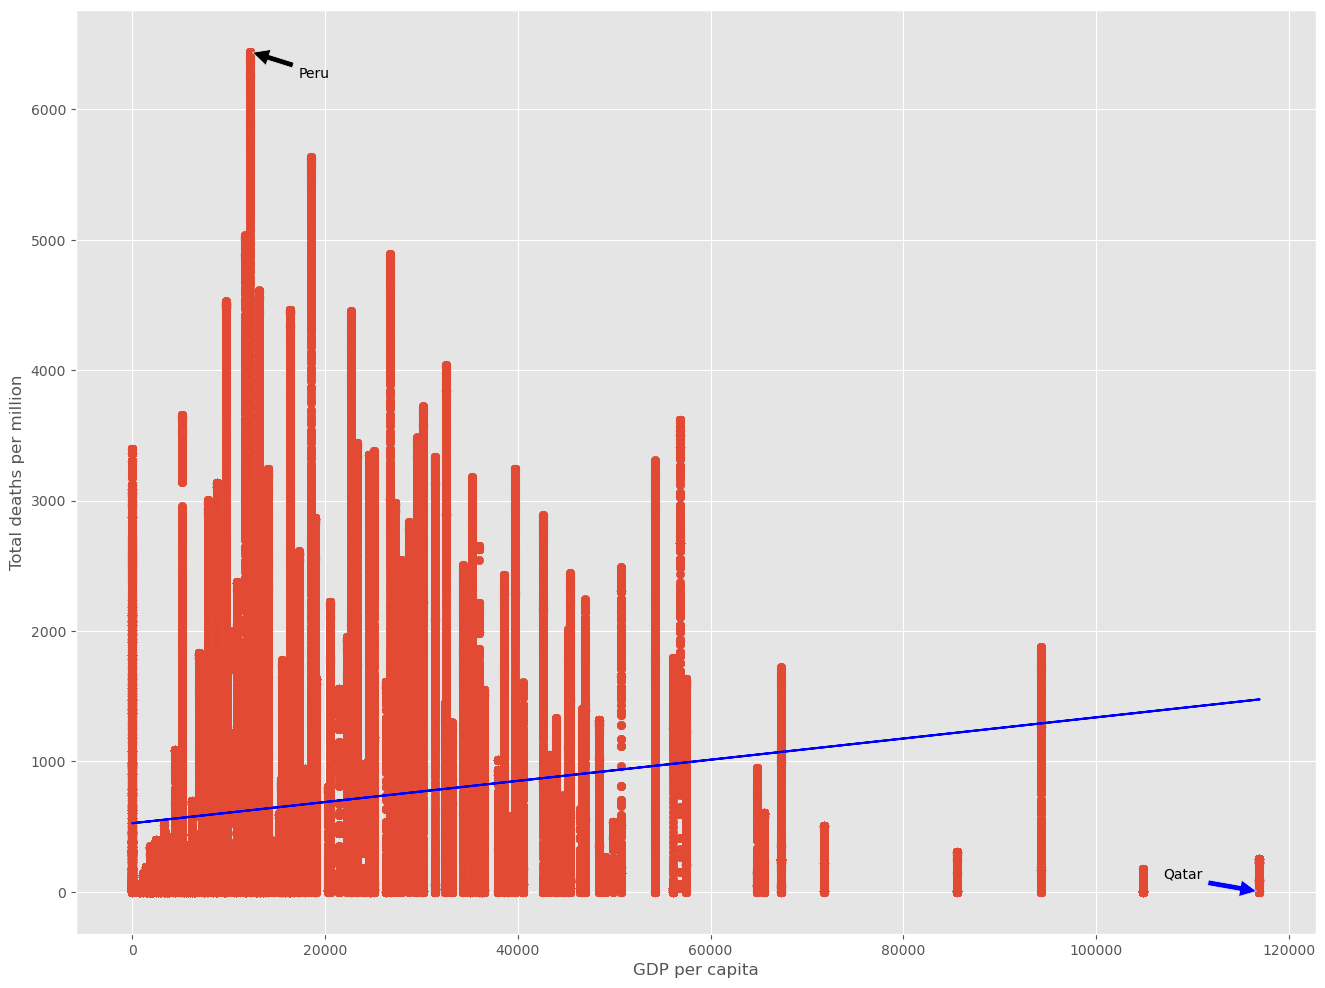

In [189]:
plt.scatter(df['gdp_per_capita'], df['total_deaths_per_million'])
plt.xlabel('GDP per capita')
plt.ylabel('Total deaths per million')

# Annotate the country with the highest GDP per capita
max_gdp = df.loc[df['gdp_per_capita'].idxmax()]
plt.annotate(max_gdp['location'], 
             xy=(max_gdp['gdp_per_capita'], max_gdp['total_deaths_per_million']),
             xytext=(max_gdp['gdp_per_capita'] - 10000, max_gdp['total_deaths_per_million'] + 100),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Annotate the country with the highest total deaths per million
max_cases = df.loc[df['total_deaths_per_million'].idxmax()]
plt.annotate(max_cases['location'], 
             xy=(max_cases['gdp_per_capita'], max_cases['total_deaths_per_million']),
             xytext=(max_cases['gdp_per_capita'] + 5000, max_cases['total_deaths_per_million'] - 200),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Calculate and plot trendline
m, b = np.polyfit(df['gdp_per_capita'], df['total_deaths_per_million'], 1)
trendline = m * df['gdp_per_capita'] + b
plt.plot(df['gdp_per_capita'], trendline, color='blue')

# Show plot
plt.show()


The above graph is correct as the highest death per million was in peru - referance Google 

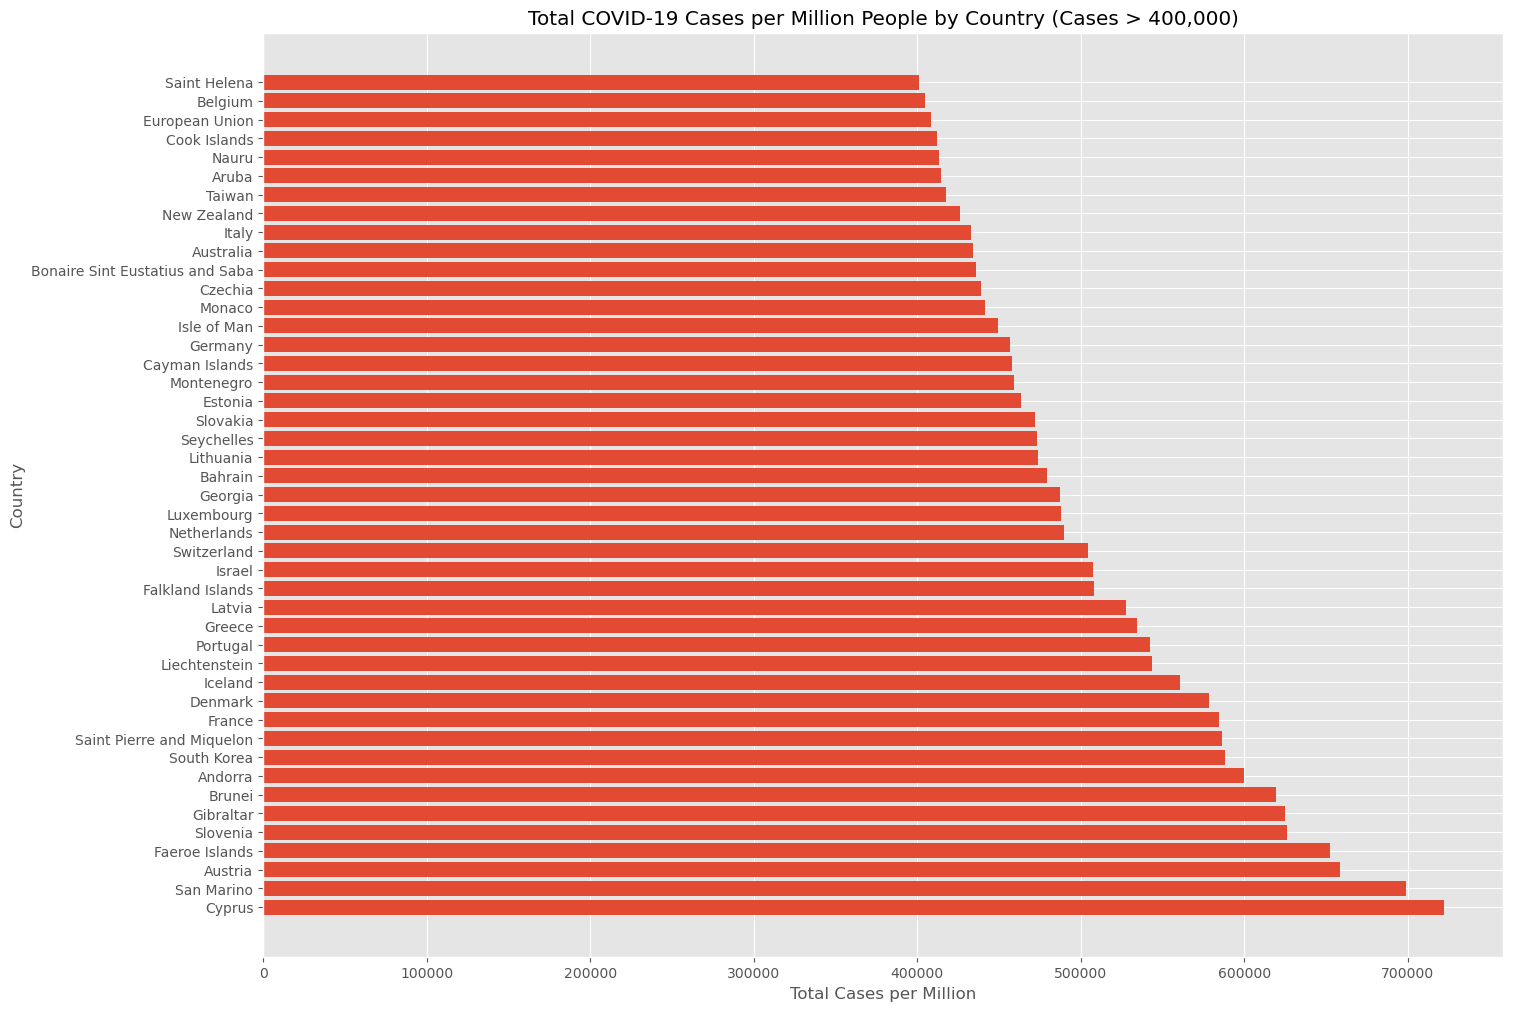

In [190]:
df_filtered = df[df['total_cases_per_million'] > 400000]

# Sort the filtered dataframe by total_cases_per_million
df_filtered = df_filtered.sort_values('total_cases_per_million', ascending=False)

# Create a horizontal bar chart
plt.barh(df_filtered['location'], df_filtered['total_cases_per_million'])

# Set the title and axis labels
plt.title('Total COVID-19 Cases per Million People by Country (Cases > 400,000)')
plt.xlabel('Total Cases per Million')
plt.ylabel('Country')

# Show the plot
plt.show()

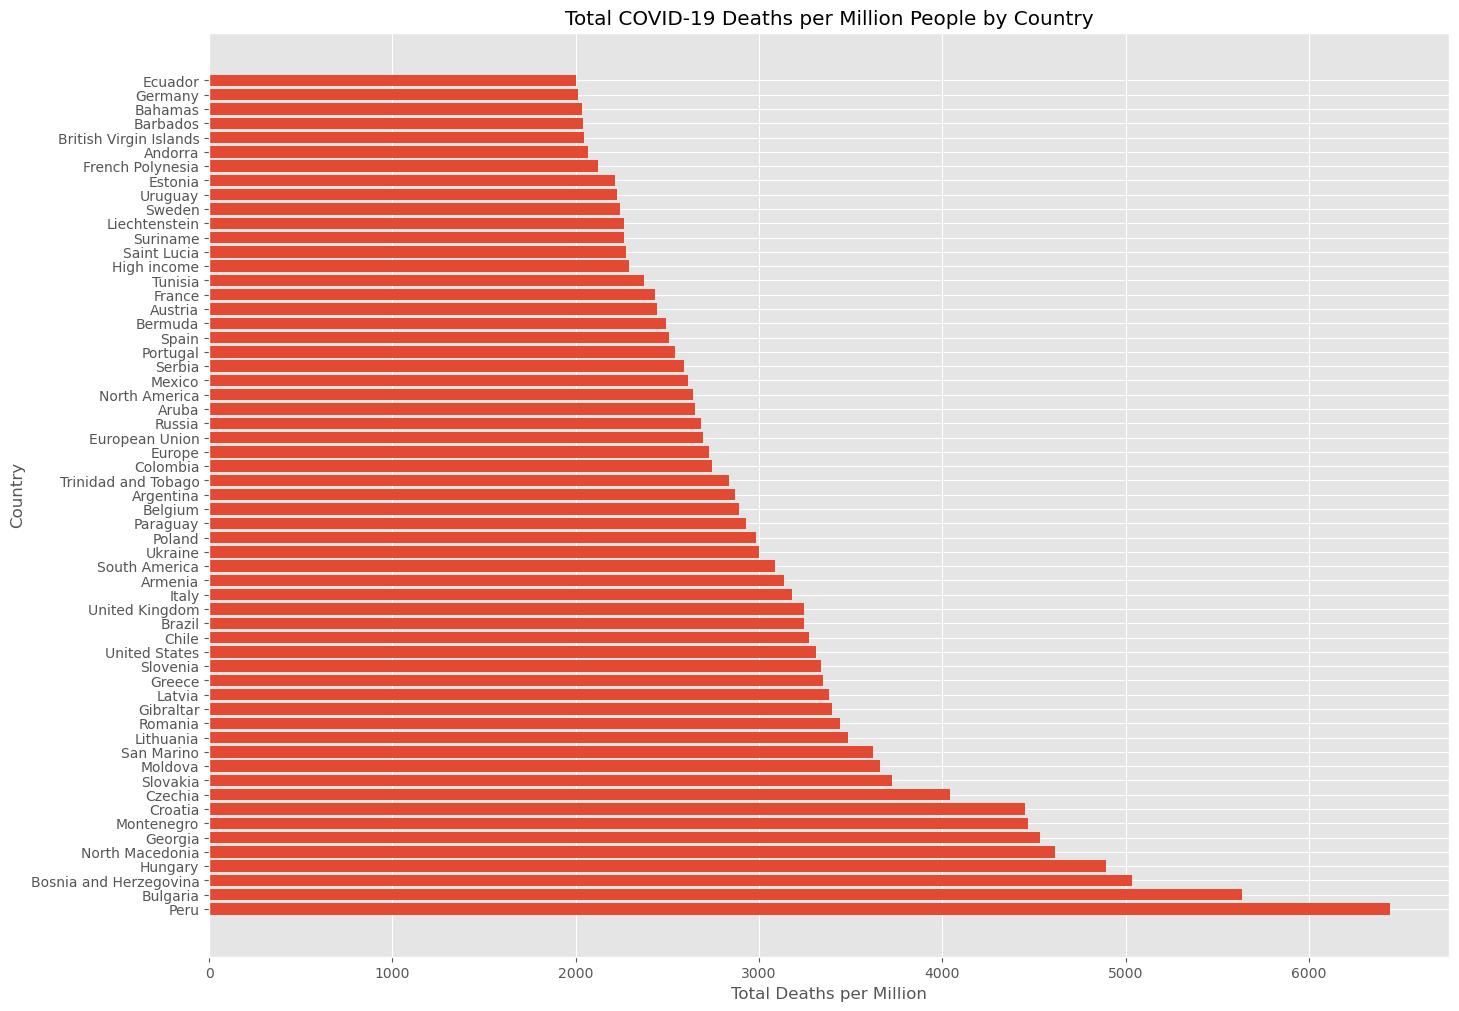

In [191]:
df_filtered = df[df['total_deaths_per_million'] > 2000]

# Sort the filtered dataframe by total_deaths_per_million
df_filtered = df_filtered.sort_values('total_deaths_per_million', ascending=False)

# Create a horizontal bar chart
plt.barh(df_filtered['location'], df_filtered['total_deaths_per_million'])

# Set the title and axis labels
plt.title('Total COVID-19 Deaths per Million People by Country')
plt.xlabel('Total Deaths per Million')
plt.ylabel('Country')

# Show the plot
plt.show()

 --- Peru has the highest total death per million followed by bulgaria 

In [306]:
df_filtered = df[df['total_deaths_per_million'] != 0]

# Find the row with the lowest stringency index value
lowest_country = df_filtered.loc[df_filtered['total_deaths_per_million'].idxmin()]

# Print the name of the country and its stringency index value
print(f"The country with the lowest Total death per million is {lowest_country['location']} with a value of {lowest_country['total_deaths_per_million']}")

The country with the lowest Total death per million is Africa with a value of 0.001


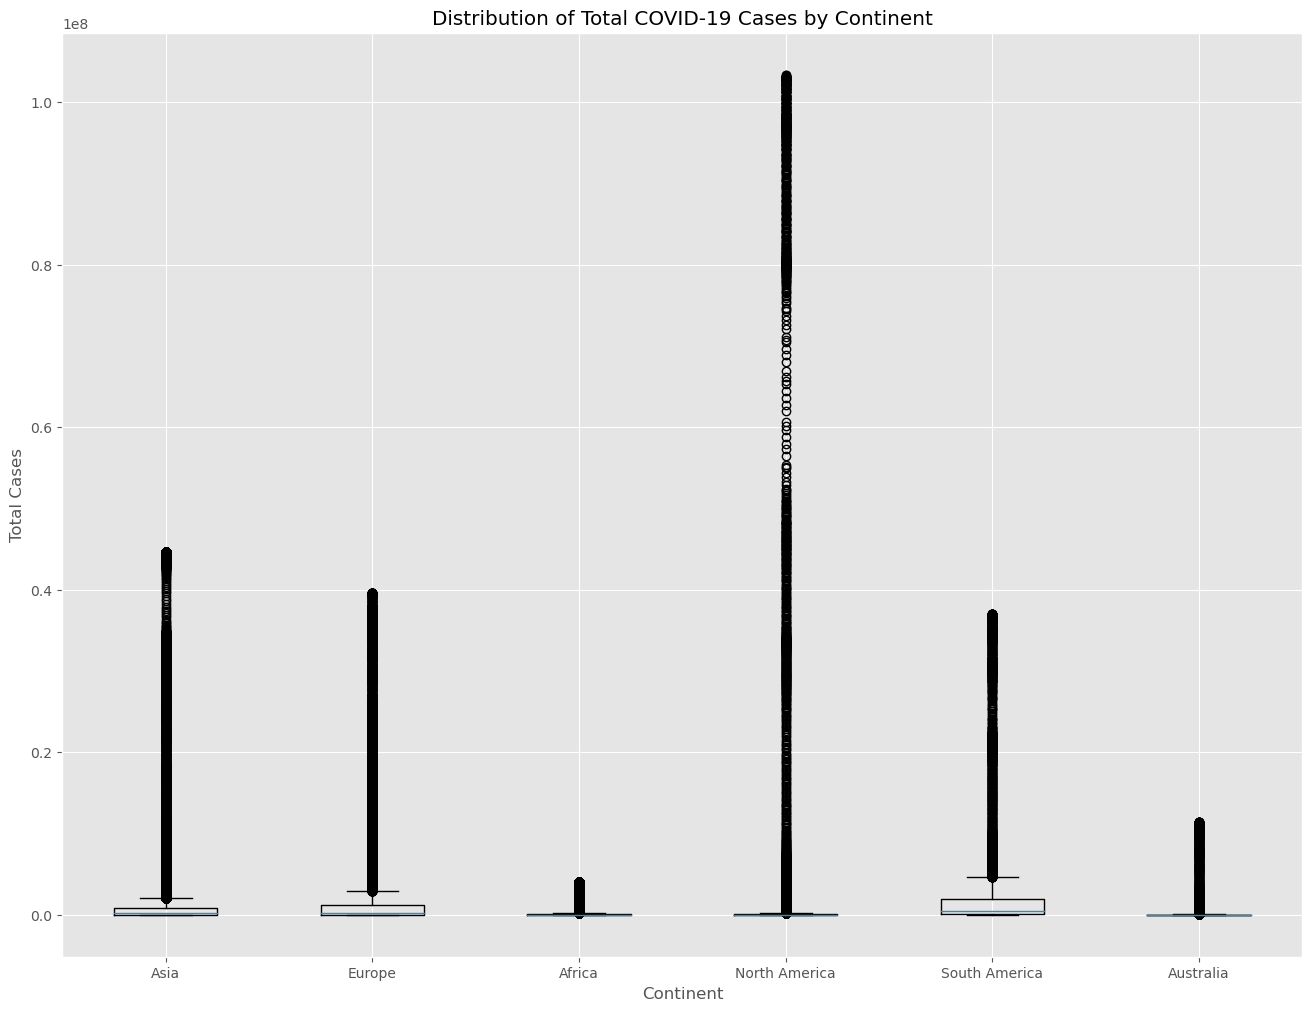

In [192]:
df = df[df['continent'].notna()]

# Create a box plot of total cases for each continent
plt.boxplot([df[df['continent'] == 'Asia']['total_cases'],
             df[df['continent'] == 'Europe']['total_cases'],
             df[df['continent'] == 'Africa']['total_cases'],
             df[df['continent'] == 'North America']['total_cases'],
             df[df['continent'] == 'South America']['total_cases'],
             df[df['continent'] == 'Australia']['total_cases']],
            labels=['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Australia'])

# Set the title and axis labels
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')

# Show the plot
plt.show()

## Analysis on Stringency Index

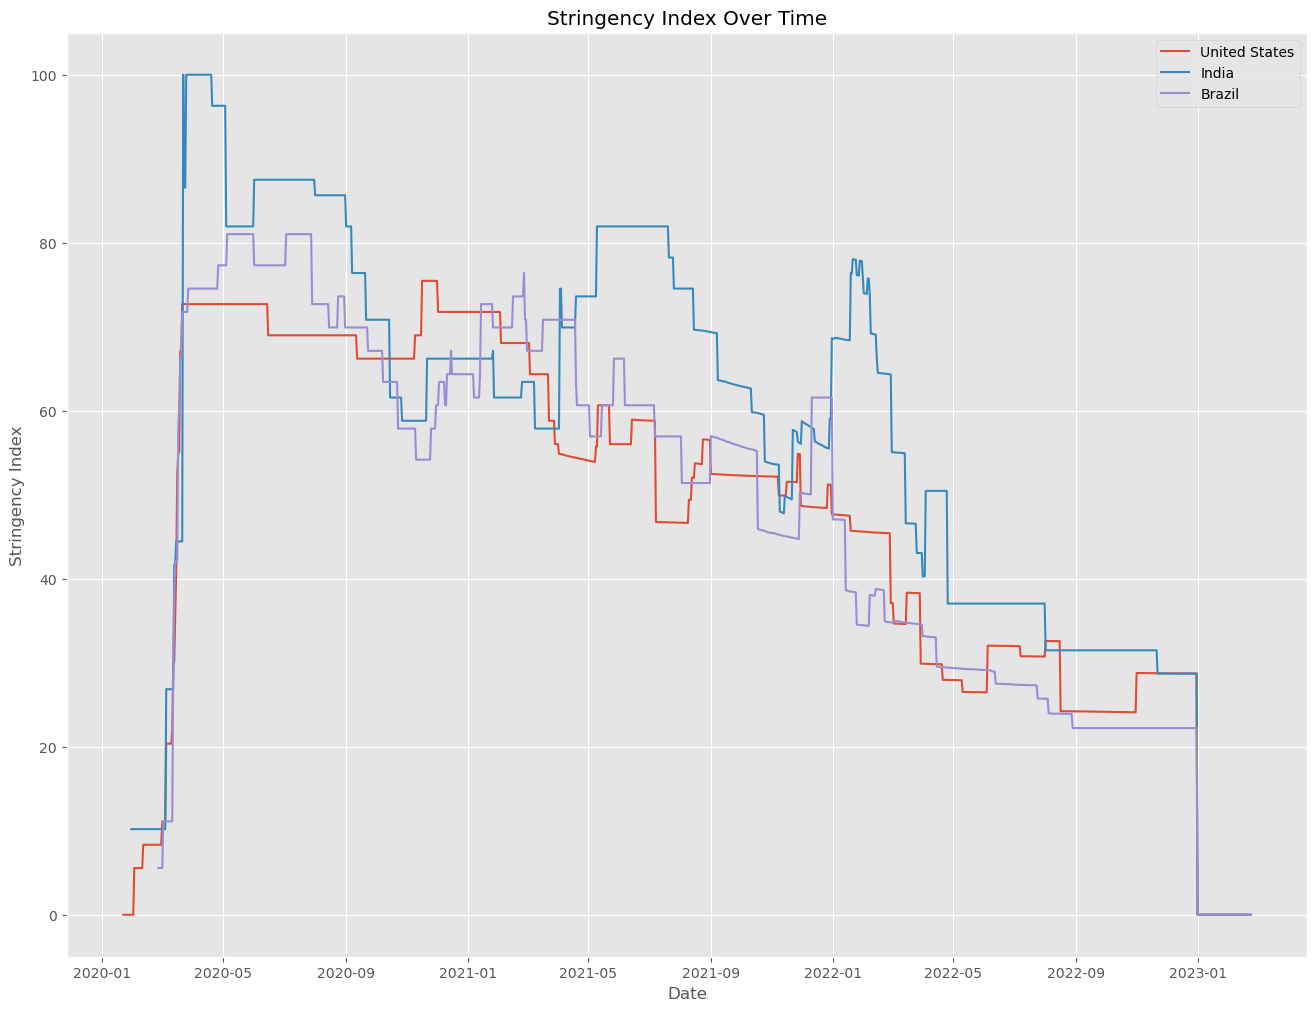

In [199]:
df_strng = df[['location', 'date', 'stringency_index']]

# Group the data by location and date
grouped_df = df_strng.groupby(['location', 'date']).mean().reset_index()

# Plot the data for selected countries
countries = ['United States', 'India', 'Brazil']
for country in countries:
    country_data = grouped_df[grouped_df['location'] == country]
    plt.plot(country_data['date'], country_data['stringency_index'], label=country)

# Set the title and axis labels
plt.title('Stringency Index Over Time')
plt.xlabel('Date')
plt.ylabel('Stringency Index')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [262]:
df[df['stringency_index']>10].head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
10,AFG,Asia,Afghanistan,2020-03-05,5.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0


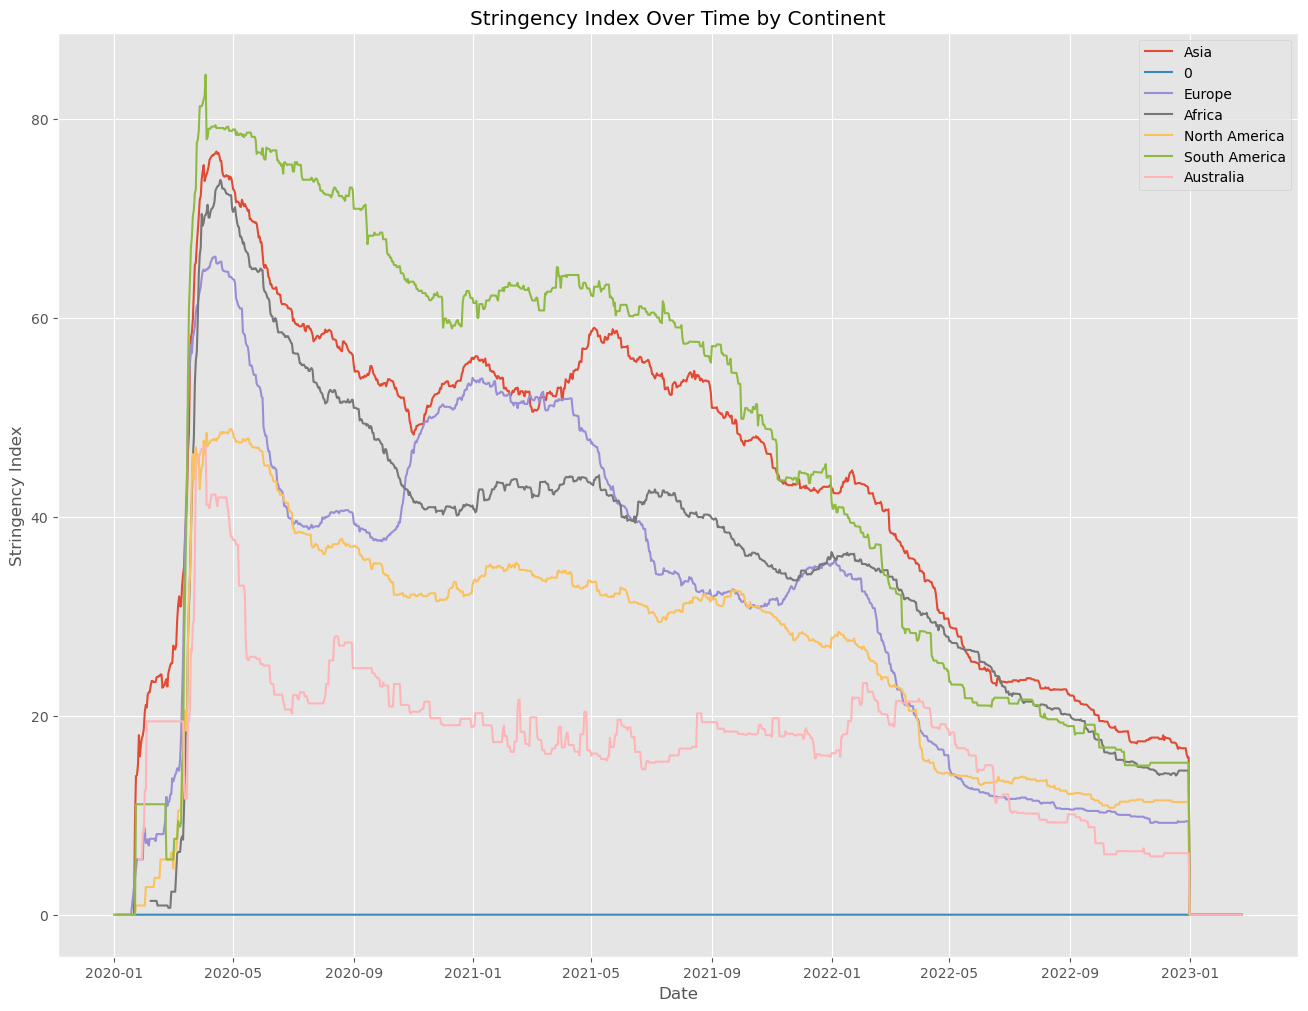

In [197]:
df_grouped = df.groupby(['continent', 'date']).mean().reset_index()

# Plot the stringency index over time for each continent
continents = df['continent'].unique()
for continent in continents:
    df_continent = df_grouped[df_grouped['continent'] == continent]
    plt.plot(df_continent['date'], df_continent['stringency_index'], label=continent)

# Add the title and axis labels
plt.title('Stringency Index Over Time by Continent')
plt.xlabel('Date')
plt.ylabel('Stringency Index')

# Add the legend
plt.legend()

# Show the plot
plt.show()

Stringency Index : The nine metrics used to calculate the Stringency Index are: school closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements; and international travel controls.

The index on any given day is calculated as the mean score of the nine metrics, each taking a value between 0 and 100. See the authors’ full description of how this index is calculated.

A higher score indicates a stricter response (i.e. 100 = strictest response). If policies vary at the subnational level, the index is shown as the response level of the strictest sub-region.

Since government policies may differ by vaccination status, a stringency index is calculated for three categories: those who are vaccinated; those who are non-vaccinated; and a national average which is weighted based on the share of people that are vaccinated.

It’s important to note that this index simply records the strictness of government policies. It does not measure or imply the appropriateness or effectiveness of a country’s response. A higher score does not necessarily mean that a country’s response is ‘better’ than others lower on the index.

Containment and Health Index

In [285]:
df_strng = df[['location', 'stringency_index']]

# Group the data by location and calculate the mean stringency index
grouped_df = df_strng.groupby('location').mean().reset_index()

# Find the country with the highest mean stringency index
highest_country = grouped_df.loc[grouped_df['stringency_index'].idxmax()]

# Print the name of the country and its mean stringency index
print(f"The country with the highest mean stringency index is {highest_country['location']} with a value of {highest_country['stringency_index']}.")

The country with the highest mean stringency index is China with a value of 68.05162090345438.


In [289]:

# Find the location with the lowest stringency index
lowest_country = grouped_df.loc[grouped_df['stringency_index'].idxmin()]

# Print the name of the country and its stringency index
print(f"The country with the lowest stringency index is {lowest_country['location']} with a value of {lowest_country['stringency_index']}.")


The country with the lowest stringency index is Africa with a value of 0.0.


In [290]:
df_filtered = df[df['stringency_index'] != 0]

# Find the row with the lowest stringency index value
lowest_country = df_filtered.loc[df_filtered['stringency_index'].idxmin()]

# Print the name of the country and its stringency index value
print(f"The country with the lowest non-zero stringency index is {lowest_country['location']} with a value of {lowest_country['stringency_index']}")

The country with the lowest non-zero stringency index is Afghanistan with a value of 2.78


## Observation On Stringency Index 

    1. The country with the highest mean stringency index is China with a value of 68.05162090345438 that means the restriction in china was more 
    2. The country with the lowest non-zero stringency index is Afghanistan with a value of 2.78

## Analysis on Excess mortality

Excess mortality is a term used in epidemiology and public health that refers to the number of deaths from all causes during a crisis above and beyond what we would have expected to see under ‘normal’ conditions.1 In this case, we’re interested in how the number of deaths during the COVID-19 pandemic compares to the deaths we would have expected had the pandemic not occurred — a crucial quantity that cannot be known but can be estimated in several ways.

Excess mortality is a more comprehensive measure of the total impact of the pandemic on deaths than the confirmed COVID-19 death count alone. It captures not only the confirmed deaths, but also COVID-19 deaths that were not correctly diagnosed and reported2 as well as deaths from other causes that are attributable to the overall crisis conditions

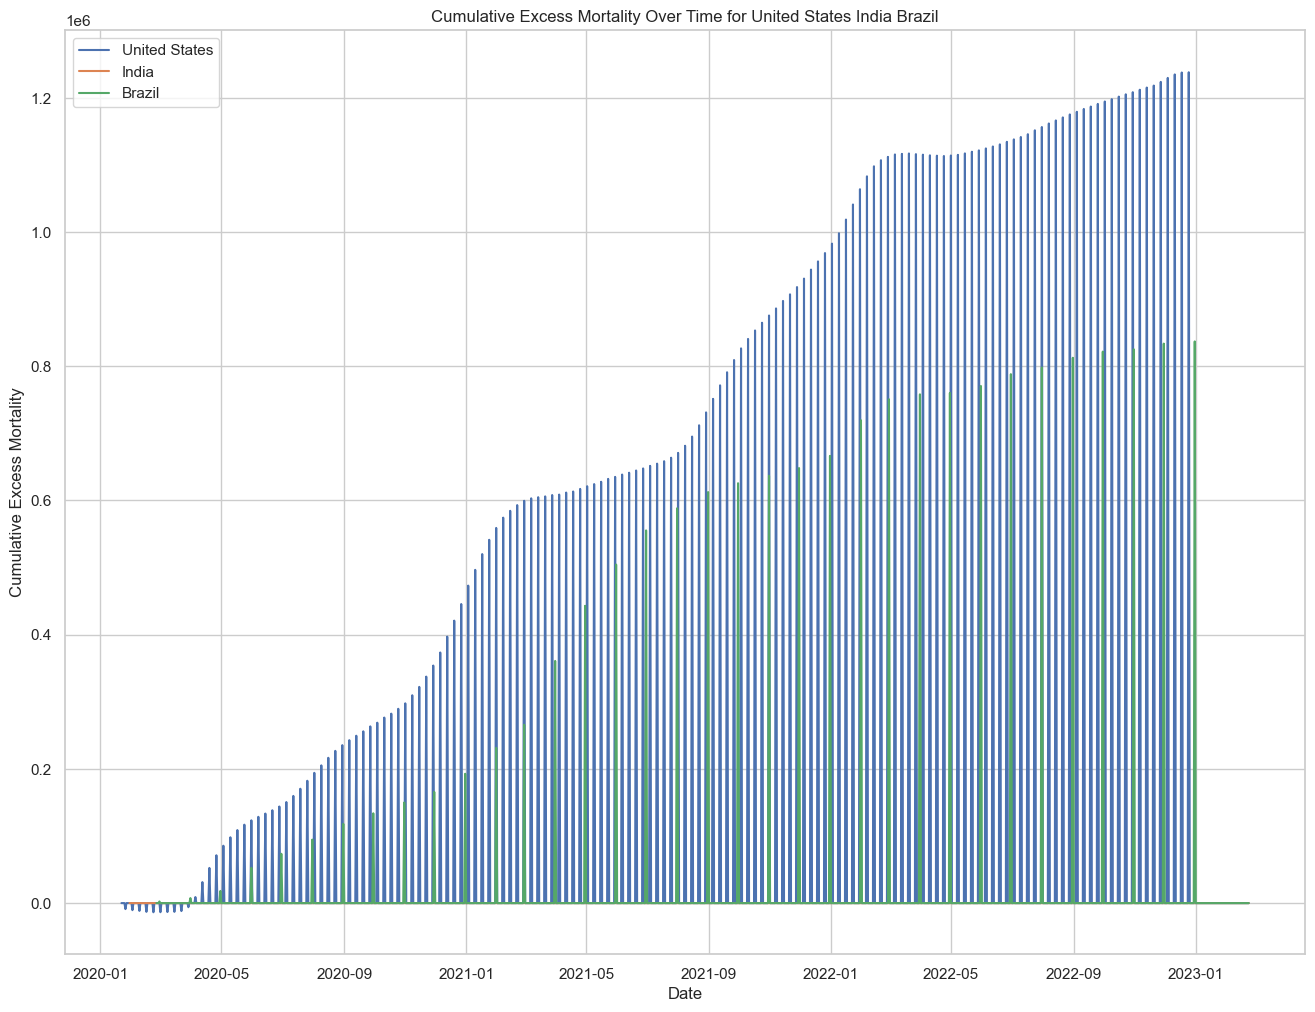

In [284]:
df_mortality = df[['location', 'date', 'excess_mortality_cumulative_absolute']]

# Group the data by location and date
grouped_df = df_mortality.groupby(['location', 'date']).sum().reset_index()

# Plot the data for selected countries
countries = ['United States', 'India', 'Brazil']
for country in countries:
    country_data = grouped_df[grouped_df['location'] == country]
    plt.plot(country_data['date'], country_data['excess_mortality_cumulative_absolute'], label=country)

# Set the title and axis labels
plt.title('Cumulative Excess Mortality Over Time for United States India Brazil')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Mortality')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [243]:
df[df['excess_mortality_cumulative_absolute']>1000000].head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
192101,RUS,Europe,Russia,2021-11-30,9468640.0,31990.0,32901.429,269900.0,1195.0,1196.286,...,58.3,0.0,8.05,72.58,0.824,144713312.0,1015090.25,30.24,76.92,6995.6650
192132,RUS,Europe,Russia,2021-12-31,10320405.0,20482.0,22207.714,302671.0,880.0,914.714,...,58.3,0.0,8.05,72.58,0.824,144713312.0,1076833.10,30.74,42.09,7421.1763
192163,RUS,Europe,Russia,2022-01-31,11670366.0,123033.0,97477.000,324672.0,612.0,642.000,...,58.3,0.0,8.05,72.58,0.824,144713312.0,1107949.50,30.23,19.23,7656.1685
192191,RUS,Europe,Russia,2022-02-28,16161596.0,105745.0,123424.000,344655.0,721.0,762.286,...,58.3,0.0,8.05,72.58,0.824,144713312.0,1159745.50,30.49,37.31,8014.0900
192222,RUS,Europe,Russia,2022-03-31,17583111.0,18925.0,21388.286,361348.0,334.0,347.000,...,58.3,0.0,8.05,72.58,0.824,144713312.0,1209678.20,30.58,33.04,8359.1360


In [249]:
max_value_index = df['excess_mortality_cumulative_absolute'].idxmax()
max_country = df.loc[max_value_index, 'location']
max_value = df.loc[max_value_index, 'excess_mortality_cumulative_absolute']
print("Country with the highest excess mortality cumulative absolute value is", max_country, "with a value of", max_value)

Country with the highest excess mortality cumulative absolute value is Russia with a value of 1273322.8


In [256]:
lowest_country = df.nsmallest(1, 'excess_mortality_cumulative_absolute')
lowest_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
117003,JPN,Asia,Japan,2021-03-31,475086.0,2843.0,2009.714,9176.0,49.0,33.143,...,33.7,0.0,13.05,84.63,0.919,123951696.0,-37726.098,-2.09,-1.97,-302.74722


In [255]:
lowest_country = df.nsmallest(1, 'excess_mortality_cumulative_absolute')

# Print the country and its excess mortality value
print(f"The country with the lowest excess mortality is {lowest_country['location'].iloc[0]}, with a value of {lowest_country['excess_mortality_cumulative_absolute'].iloc[0]}.")

The country with the lowest excess mortality is Japan, with a value of -37726.098.


In [257]:
max_value_index = df['excess_mortality_cumulative_absolute'].idxmax()
max_cnt = df.loc[max_value_index, 'continent']
max_value = df.loc[max_value_index, 'excess_mortality_cumulative_absolute']
print("Continent with the highest excess mortality cumulative absolute value is", max_cnt, "with a value of", max_value)

Continent with the highest excess mortality cumulative absolute value is Europe with a value of 1273322.8


In [261]:
india_data = df[df['location'] == 'India']
max_excess_mortality = india_data['excess_mortality_cumulative_absolute'].max()
print(f"The highest value of excess mortality cumulative absolute for India is {max_excess_mortality}.")

The highest value of excess mortality cumulative absolute for India is 0.0.


## OBSERVATION FOR Excess mortality:

    1. US shows increase in trend for Cumulative Excess Mortality Over Time
    2. Country with the highest excess mortality cumulative absolute value is Russia with a value of 1273322.8
    3. The country with the lowest excess mortality is Japan, with a value of -37726.098.
    4. Continent with the highest excess mortality cumulative absolute value is Europe with a value of 1273322.8
    5. There is no data for excess mortality cumulative absolute for India

In [307]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Analysis on HUMAN DEVELOPMENT INDEX

The Human Development Index (HDI) is an index that measures key dimensions of human development. 

The three key dimensions are:

– A long and healthy life – measured by life expectancy.

– Access to education – measured by expected years of schooling of children at school-entry age and mean years of schooling of the adult population.

– And a decent standard of living – measured by Gross National Income per capita adjusted for the price level of the country.

The human devlopment index can act as main parameter to find how well a country has able to tackle the COVID-19 problems


continent_mean_hdi = df.groupby('continent')['human_development_index'].mean()

# Plot the mean human development index for each continent
continent_mean_hdi.plot(kind='bar')
plt.title('Mean Human Development Index by Continent')
plt.ylabel('Human Development Index')
plt.show()

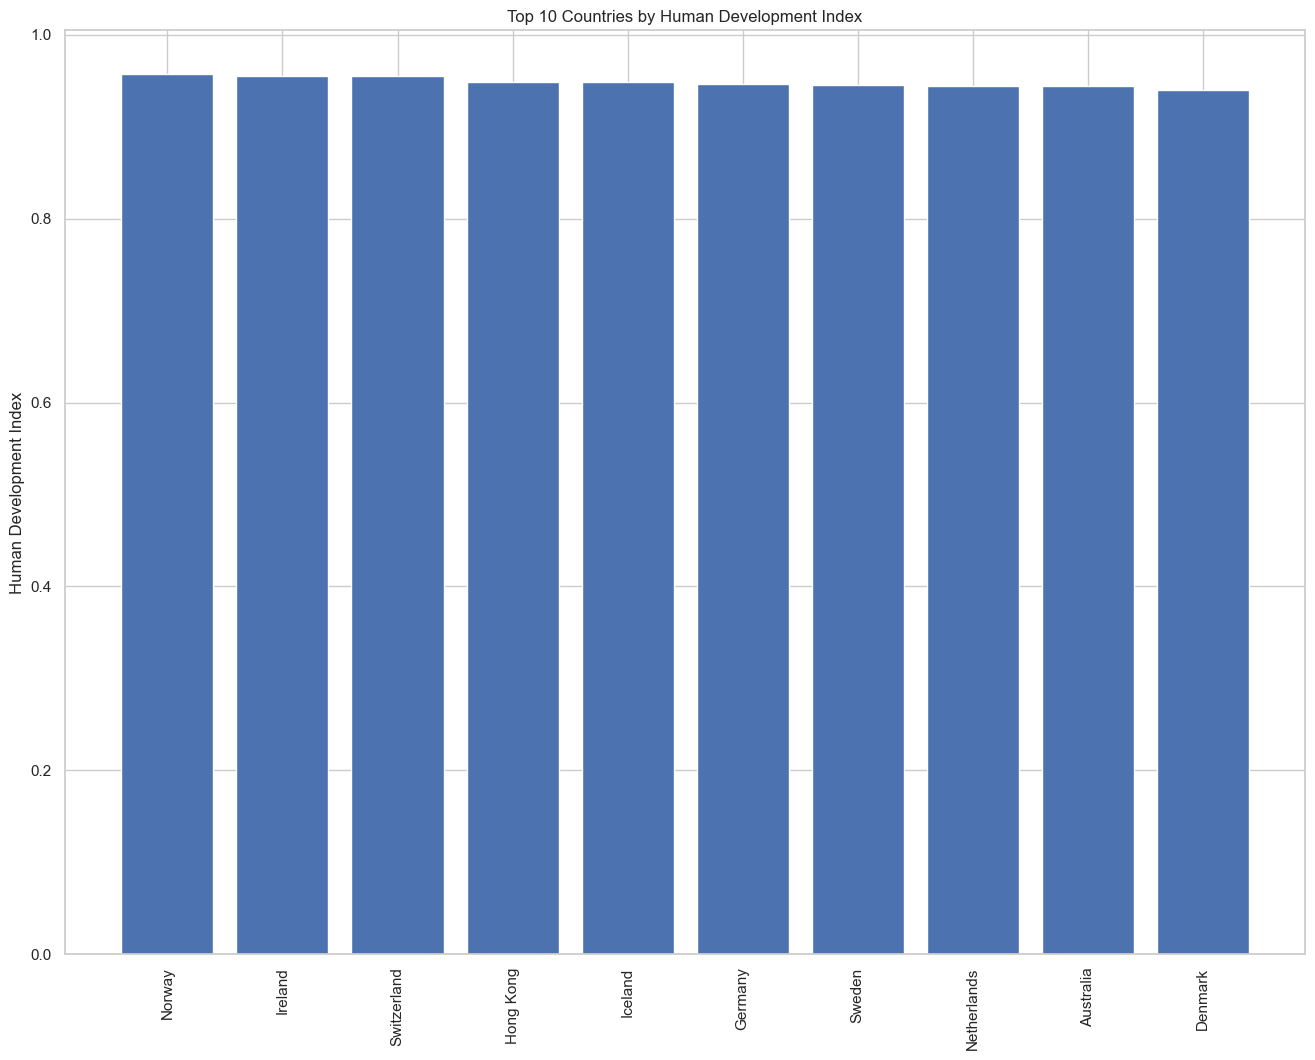

In [309]:
# Group the data by country and sort by the human development index
country_hdi = df[['location', 'human_development_index']].drop_duplicates()
country_hdi = country_hdi.sort_values('human_development_index', ascending=False)

# Plot the human development index for the top 10 countries
top_10_countries = country_hdi.head(10)
plt.bar(top_10_countries['location'], top_10_countries['human_development_index'])
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Human Development Index')
plt.ylabel('Human Development Index')
plt.show()

In [315]:
df = df[df['human_development_index'] != 0]

# find the country with the lowest HDI
lowest_country = df.loc[df['human_development_index'].idxmin()]

print(f"The country with the lowest HDI is {lowest_country['location']} with a value of {lowest_country['human_development_index']}.")

The country with the lowest HDI is Niger with a value of 0.394.


In [316]:
df = df[df['human_development_index'] != 0]

# find the country with the lowest HDI
lowest_country = df.loc[df['human_development_index'].idxmax()]

print(f"The country with the lowest HDI is {lowest_country['location']} with a value of {lowest_country['human_development_index']}.")

The country with the lowest HDI is Norway with a value of 0.957.


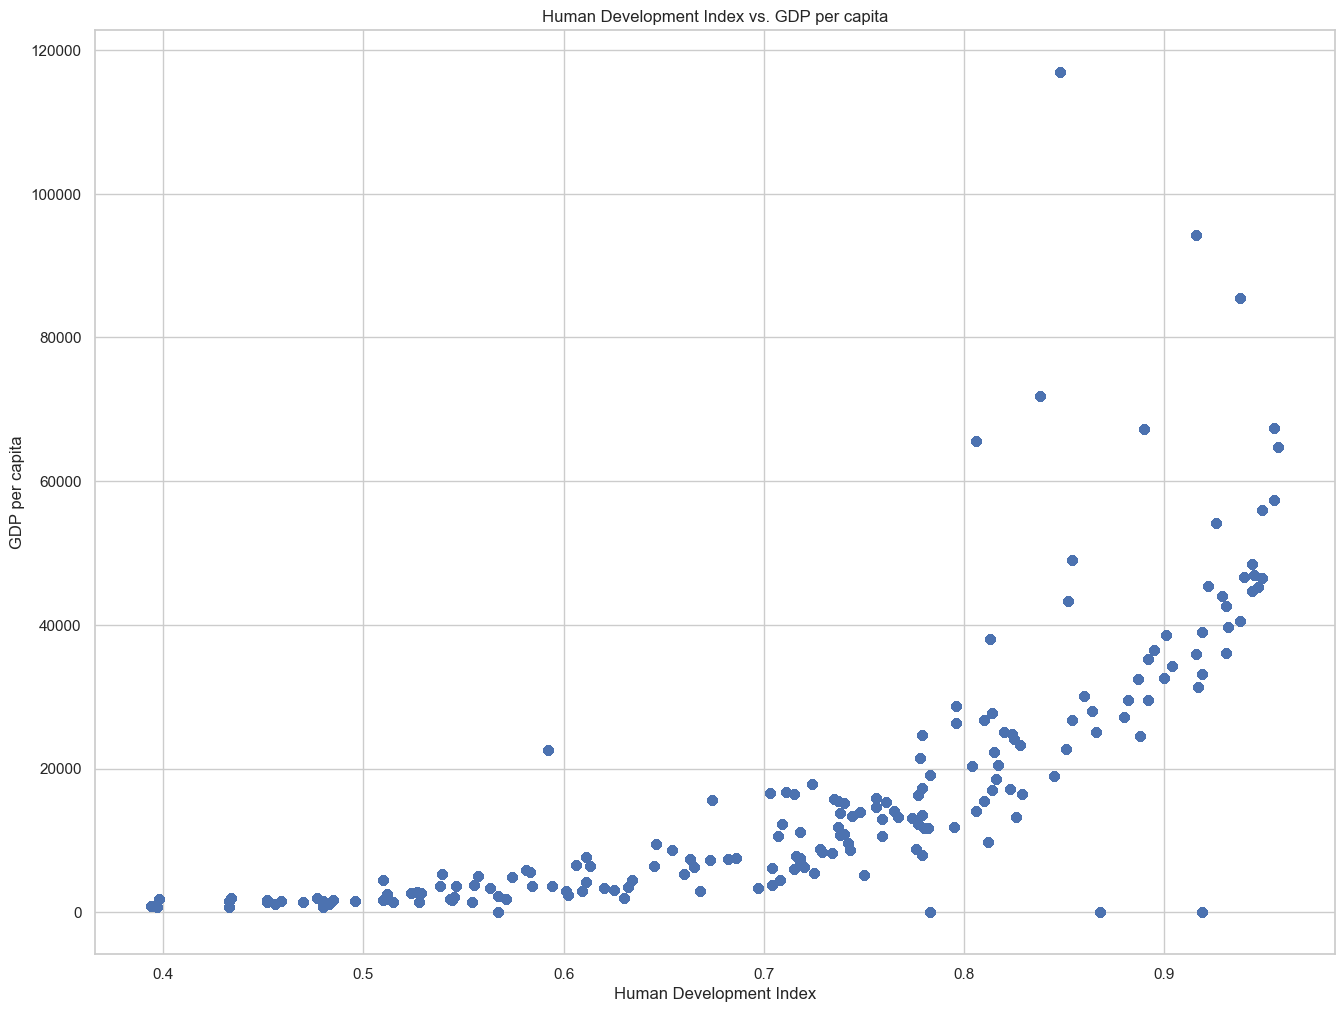

In [317]:
df = df[['location', 'human_development_index', 'gdp_per_capita']]

# Remove any rows with missing data

# Create a scatter plot
plt.scatter(df['human_development_index'], df['gdp_per_capita'])

# Set the plot title and axis labels
plt.title("Human Development Index vs. GDP per capita")
plt.xlabel("Human Development Index")
plt.ylabel("GDP per capita")

# Show the plot
plt.show()

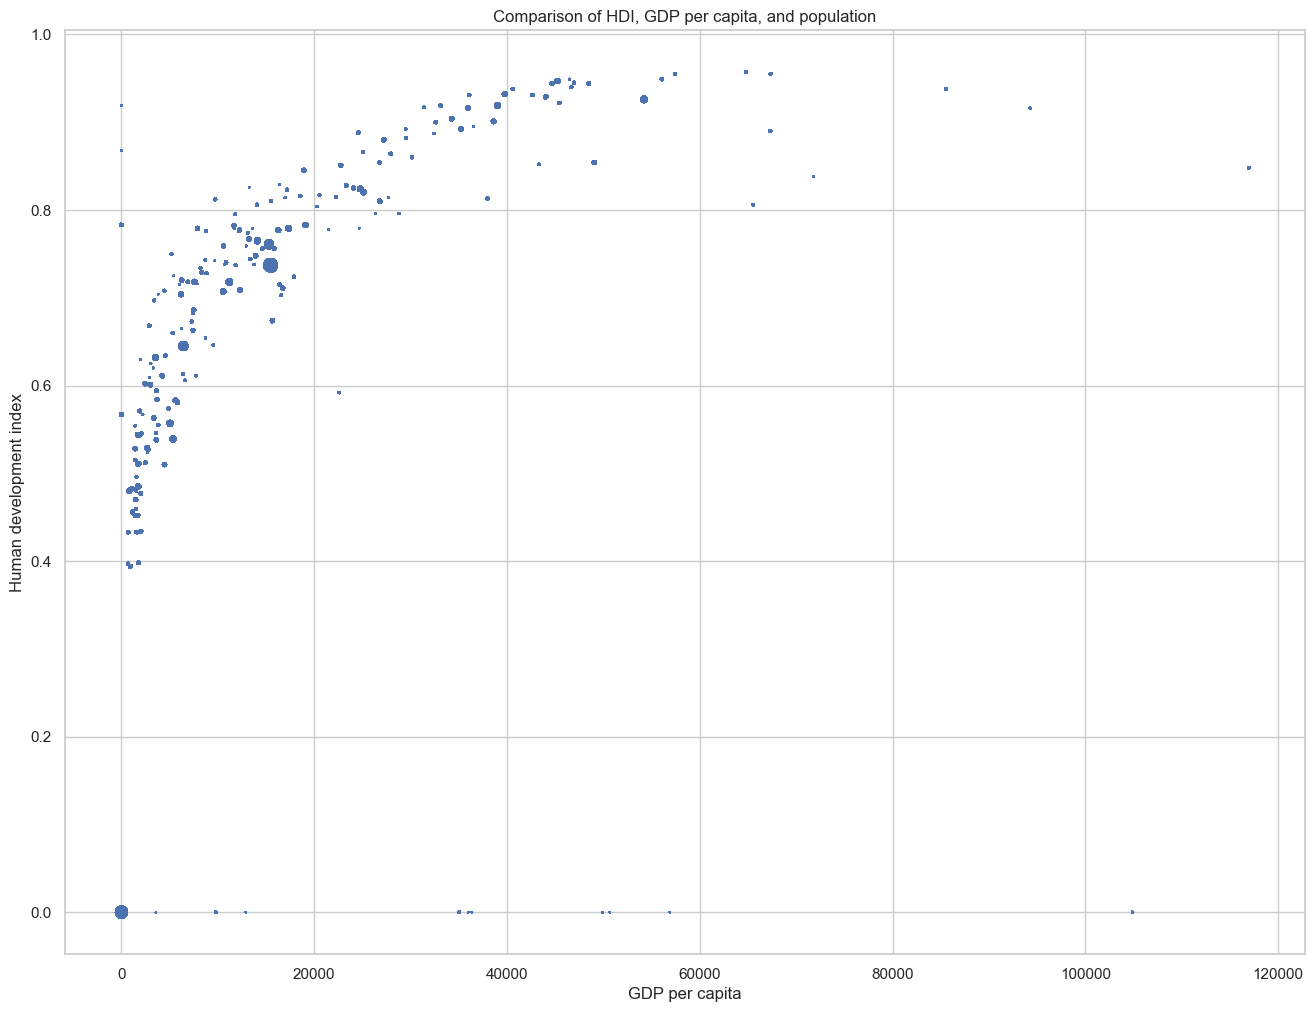

In [343]:
df = df[['location', 'human_development_index', 'gdp_per_capita', 'population']]

# Set the x and y variables for the bubble chart
x = df['gdp_per_capita']
y = df['human_development_index']

# Set the bubble size variable to the population
bubble_size = np.sqrt(df['population']) / 1000

# Create the bubble chart
plt.scatter(x, y, s=bubble_size, alpha=0.5)

# Add labels to the axes
plt.xlabel('GDP per capita')
plt.ylabel('Human development index')

# Add a title to the chart
plt.title('Comparison of HDI, GDP per capita, and population')

# Show the chart
plt.show()

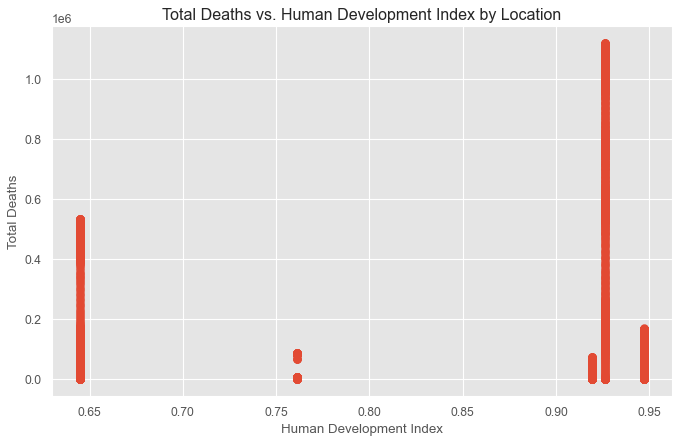

In [370]:
data = data.dropna(subset=['location', 'total_deaths', 'human_development_index'])

# create a scatter plot of total deaths and human development index by location
plt.figure(figsize=(10, 6),dpi=80)
plt.scatter(data['human_development_index'], data['total_deaths'], s=50, alpha=0.5)
plt.xlabel('Human Development Index')
plt.ylabel('Total Deaths')
plt.title('Total Deaths vs. Human Development Index by Location')
plt.show()

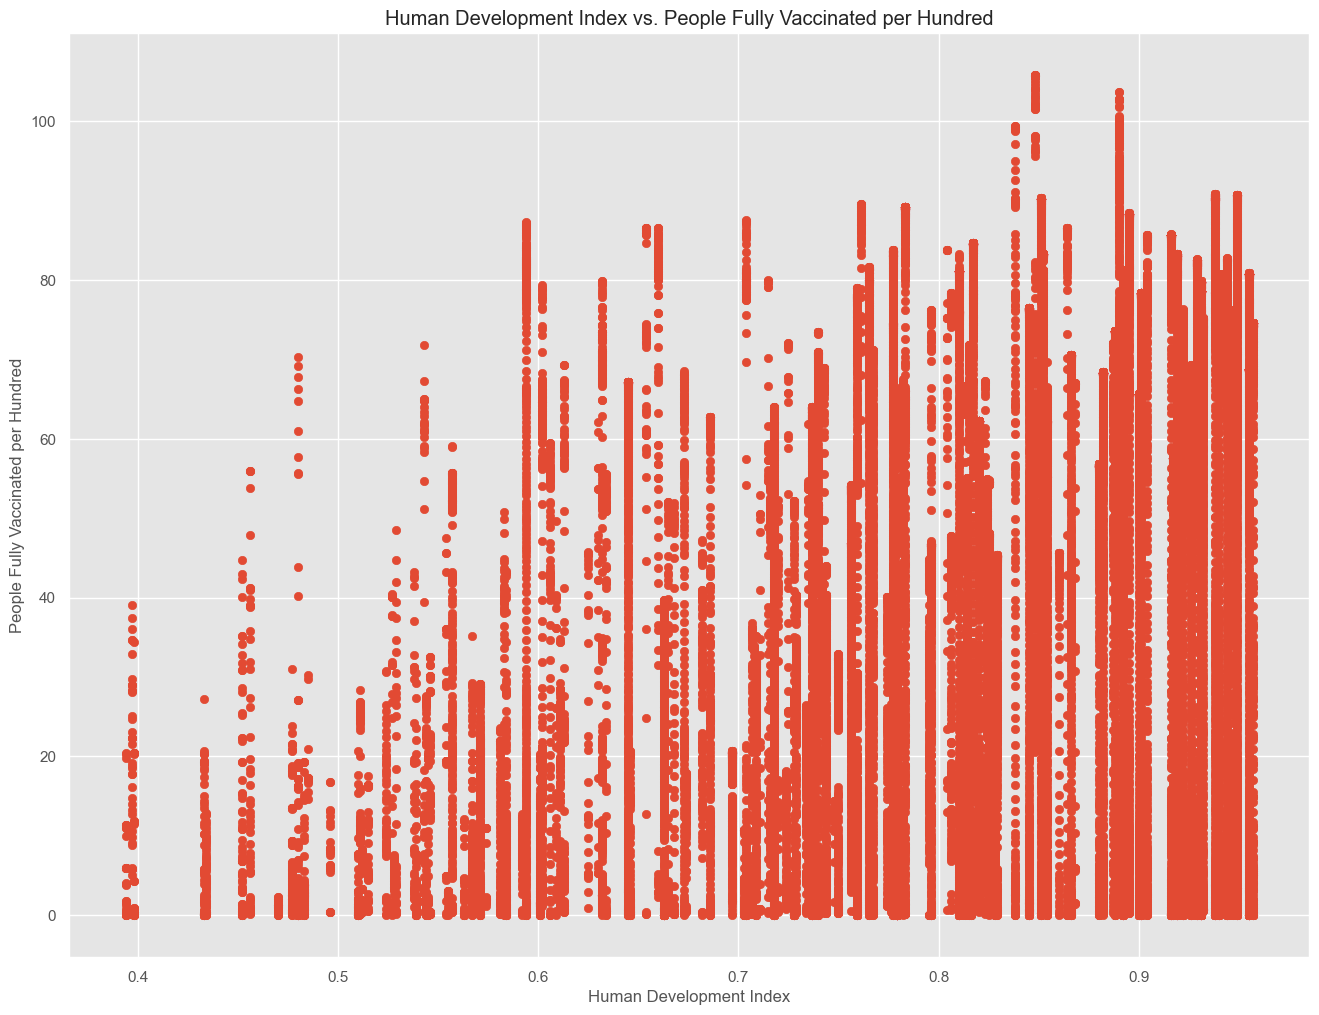

In [354]:
df = df[["location", "human_development_index", "people_fully_vaccinated_per_hundred"]]

# Drop rows with missing values

# Create scatter plot
plt.scatter(df["human_development_index"], df["people_fully_vaccinated_per_hundred"])

# Set plot title and axis labels
plt.title("Human Development Index vs. People Fully Vaccinated per Hundred")
plt.xlabel("Human Development Index")
plt.ylabel("People Fully Vaccinated per Hundred")

# Show plot
plt.show()

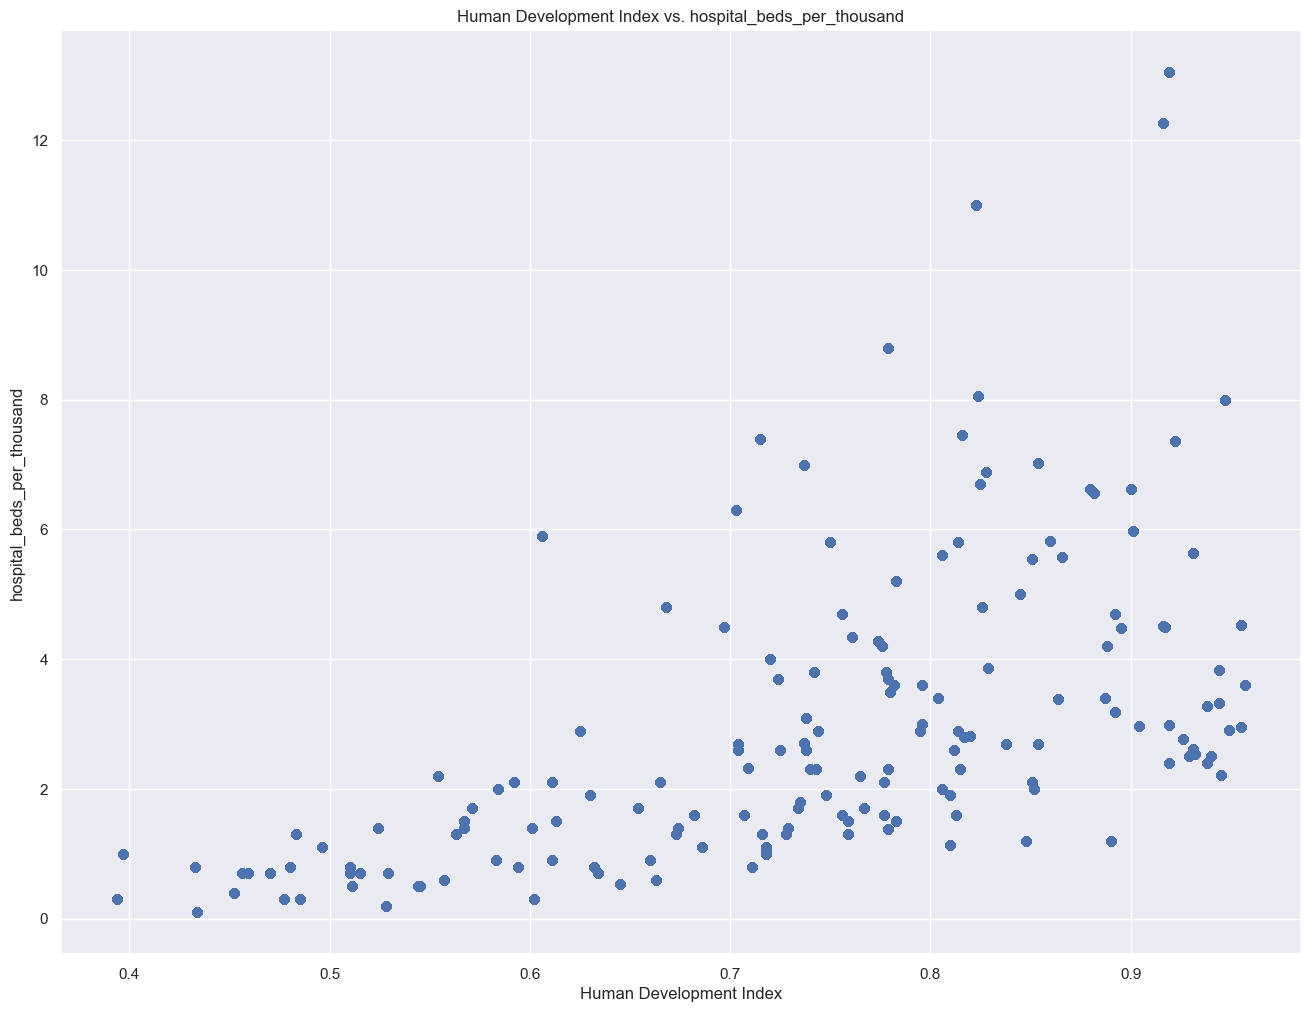

In [157]:
df = df[["location", "human_development_index", "hospital_beds_per_thousand"]]

# Drop rows with missing values

# Create scatter plot
plt.scatter(df["human_development_index"], df["hospital_beds_per_thousand"],cmap='coolwarm')

# Set plot title and axis labels
plt.title("Human Development Index vs. hospital_beds_per_thousand")
plt.xlabel("Human Development Index")
plt.ylabel("hospital_beds_per_thousand")

# Show plot
plt.show()


# OBSERVATION on HDI 

  1. The country with the lowest HDI is Niger with a value of 0.394.
  2. The country with the lowest HDI is Norway with a value of 0.957.
  3. Countries with higher HDI has performed better in vaccinating its people and providing hospital fascilities

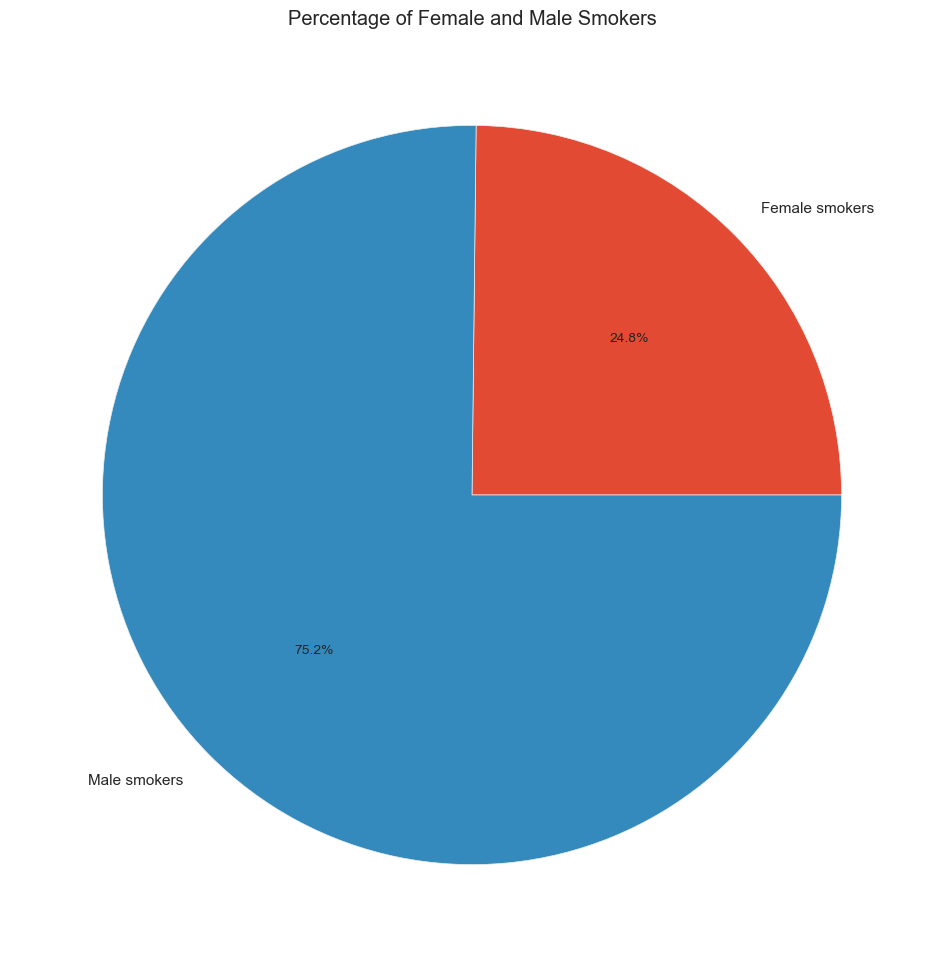

In [382]:
female_smokers = df.female_smokers.sum()
male_smokers = df.male_smokers.sum()

# create a list of values and labels
values = [female_smokers, male_smokers]
labels = ['Female smokers', 'Male smokers']

# create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# set a title for the chart
plt.title('Percentage of Female and Male Smokers')

# show the chart
plt.show()

In [196]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [110]:
'new_cases_per_million' in df


True

In [114]:
df_filtered = df[df['total_cases_per_million'] > 100000]

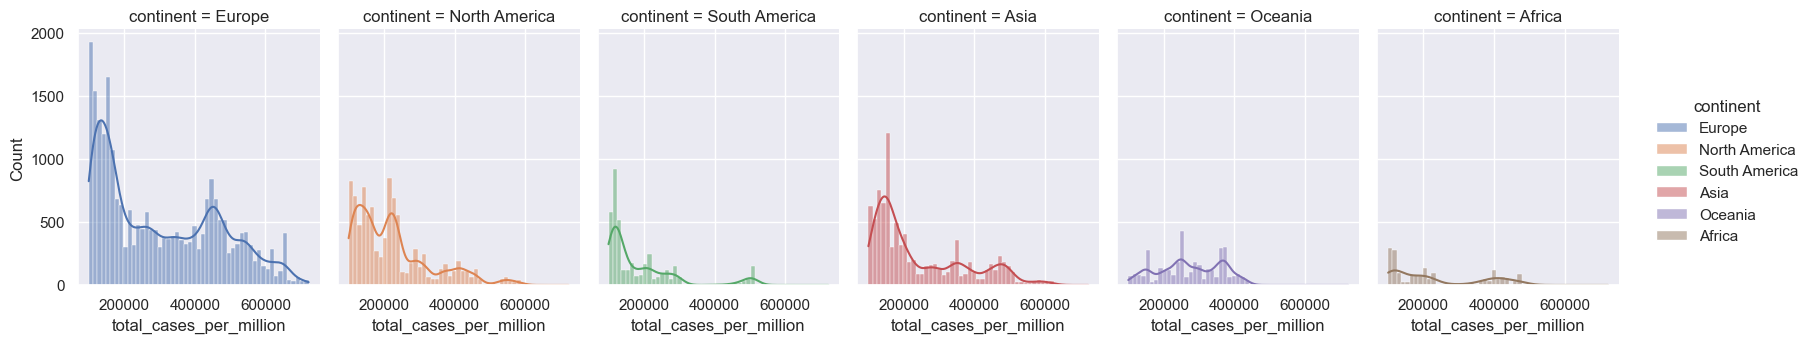

In [115]:

sns.displot(data=df_filtered, x="total_cases_per_million",hue="continent",col="continent",kde = True, height=3.6, aspect=.77)


## OBSERVATION:

The above graph shows the distribution of the total case per million for each continent 

In [411]:
df_ref = df[['continent','Year',
       'Month','date','hospital_beds_per_thousand', 'population_density','location','total_cases', 'new_cases','total_deaths','life_expectancy','gdp_per_capita','extreme_poverty' ,'human_development_index','positive_rate','male_smokers','female_smokers','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]

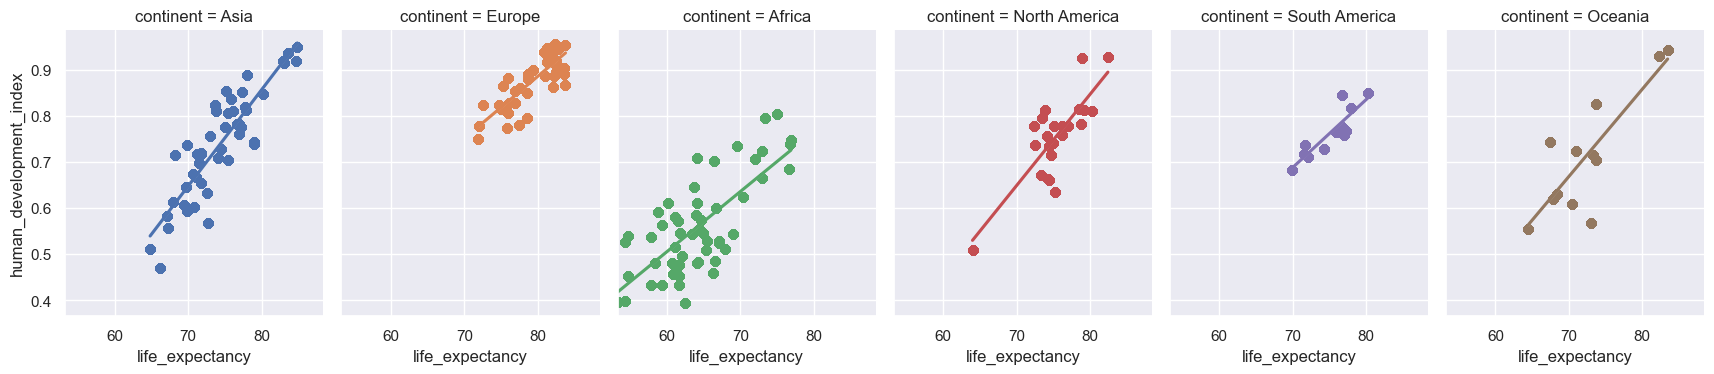

In [97]:
sns.set_theme()
sns.lmplot(data=df_ref, x="life_expectancy", y="human_development_index", col='continent',hue='continent',height=3.7, aspect=.77)

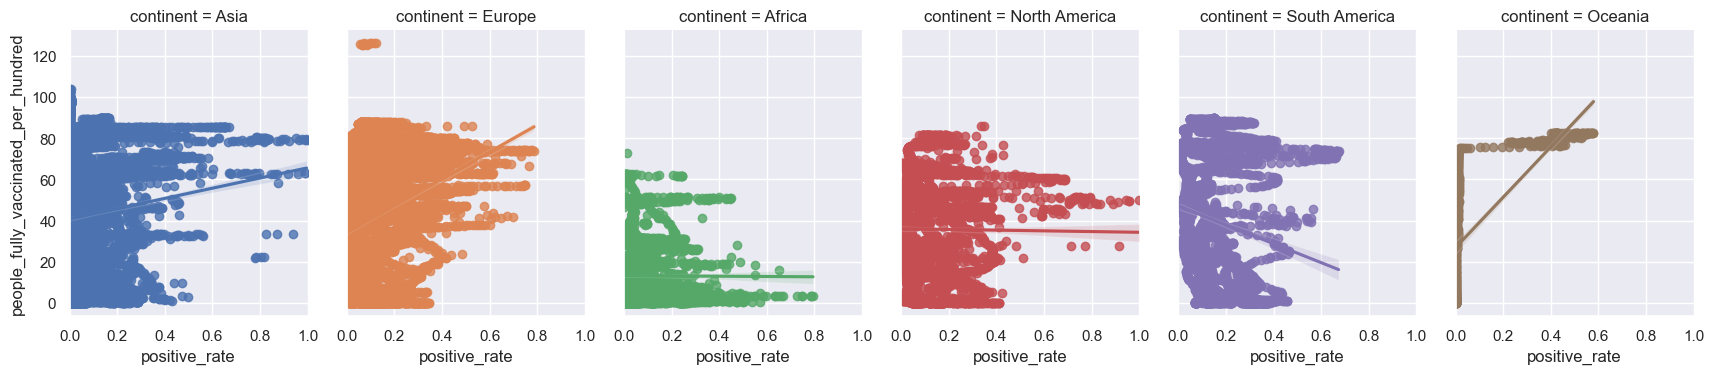

In [107]:
sns.set_theme()
sns.lmplot(data=df_ref, x="positive_rate", y="people_fully_vaccinated_per_hundred",col='continent',hue='continent',height=3.7, aspect=.77)

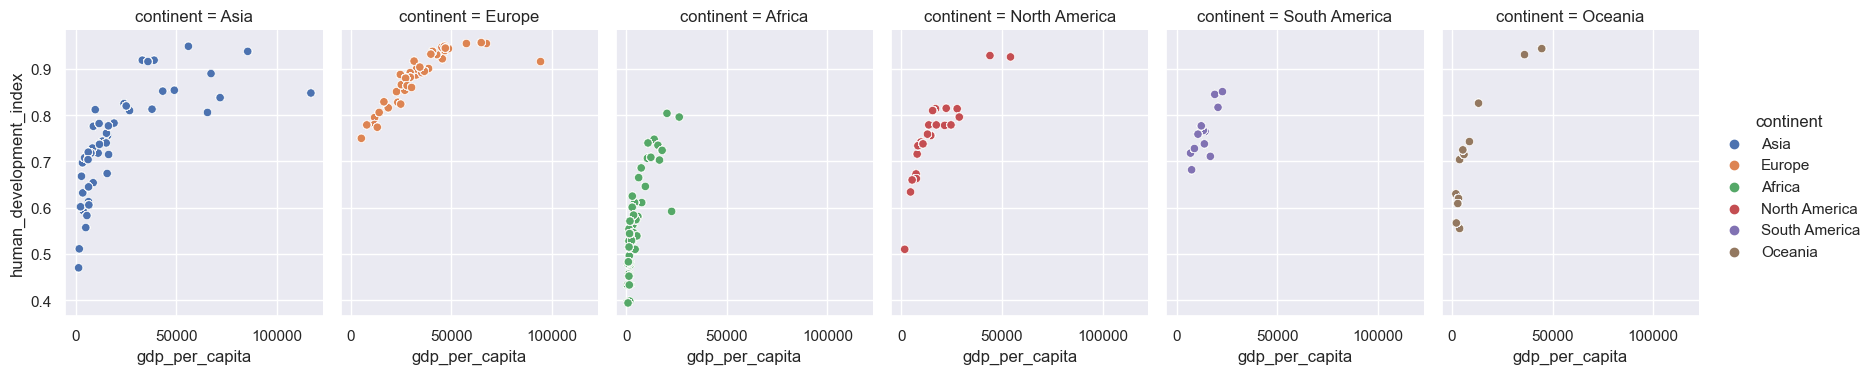

In [143]:
sns.relplot(data=df_ref, x="gdp_per_capita", y="human_development_index",col='continent',hue='continent',height=3.7, aspect=.77)


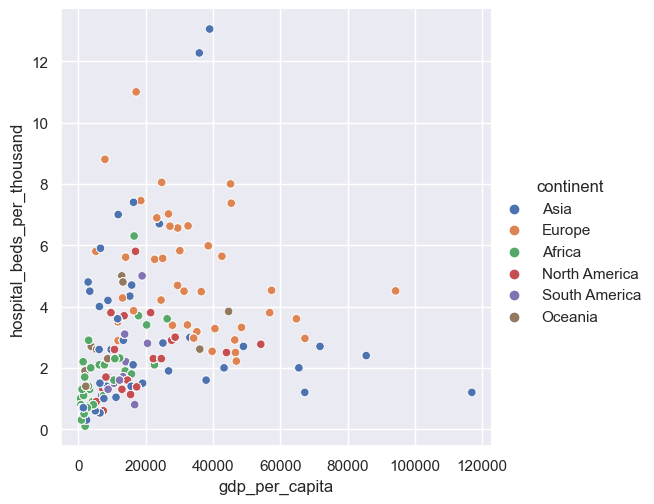

In [142]:
sns.relplot(data=df_ref, x="gdp_per_capita", y="hospital_beds_per_thousand",hue='continent')


In [150]:
df[['median_age', 'aged_65_older', 'aged_70_older']].value_counts().sum()

205921

In [156]:
df['aged_65_older'].nunique()

192

In [166]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [399]:
df.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
259632   2023-02-19
259633   2023-02-20
259634   2023-02-21
259635   2023-02-22
259636   2023-02-23
Name: date, Length: 246179, dtype: datetime64[ns]

In [400]:
df['Year'] = df['date'].dt.year


In [401]:
df.Year.value_counts()

2022    84492
2021    84097
2020    65490
2023    12100
Name: Year, dtype: int64

In [402]:
df['Month'] = df['date'].dt.month

In [403]:
dmap = {1:'Jan',2:'Feb',3:'March',4:'Aprl',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [404]:
df['Month'] = df['Month'].map(dmap)

In [413]:
df.Month.value_counts()

Jan      21340
Oct      21131
Aug      21088
Dec      21086
July     21080
May      21006
Nov      20494
Sep      20424
June     20401
Aprl     20080
Feb      19178
March    18871
Name: Month, dtype: int64

In [193]:
grpby_yr = df.groupby('Year').sum().total_deaths

In [194]:
grpby_yr

Year
2020    9.940309e+08
2021    5.925437e+09
2022    9.602401e+09
2023    1.534619e+09
Name: total_deaths, dtype: float64

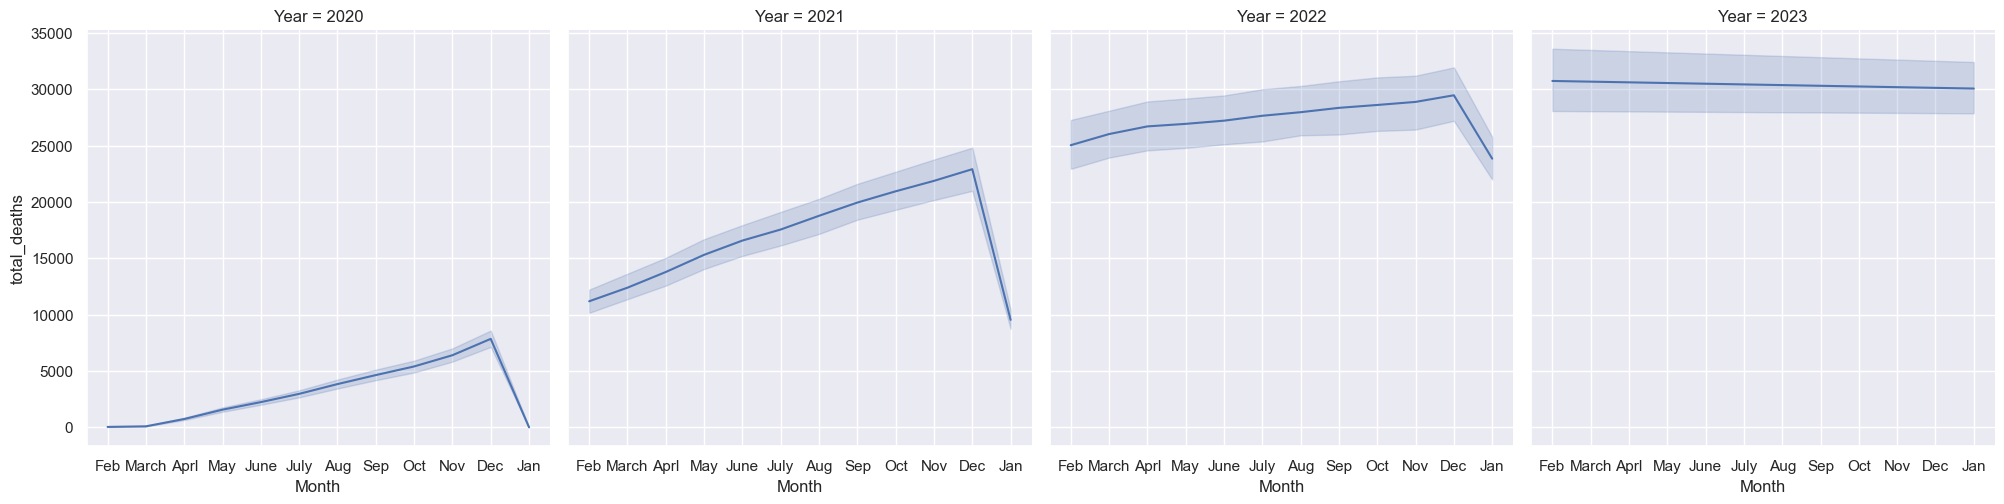

In [414]:
sns.set_theme()

sns.relplot(data=df_ref, x="Month", y="total_deaths", kind="line",col='Year')

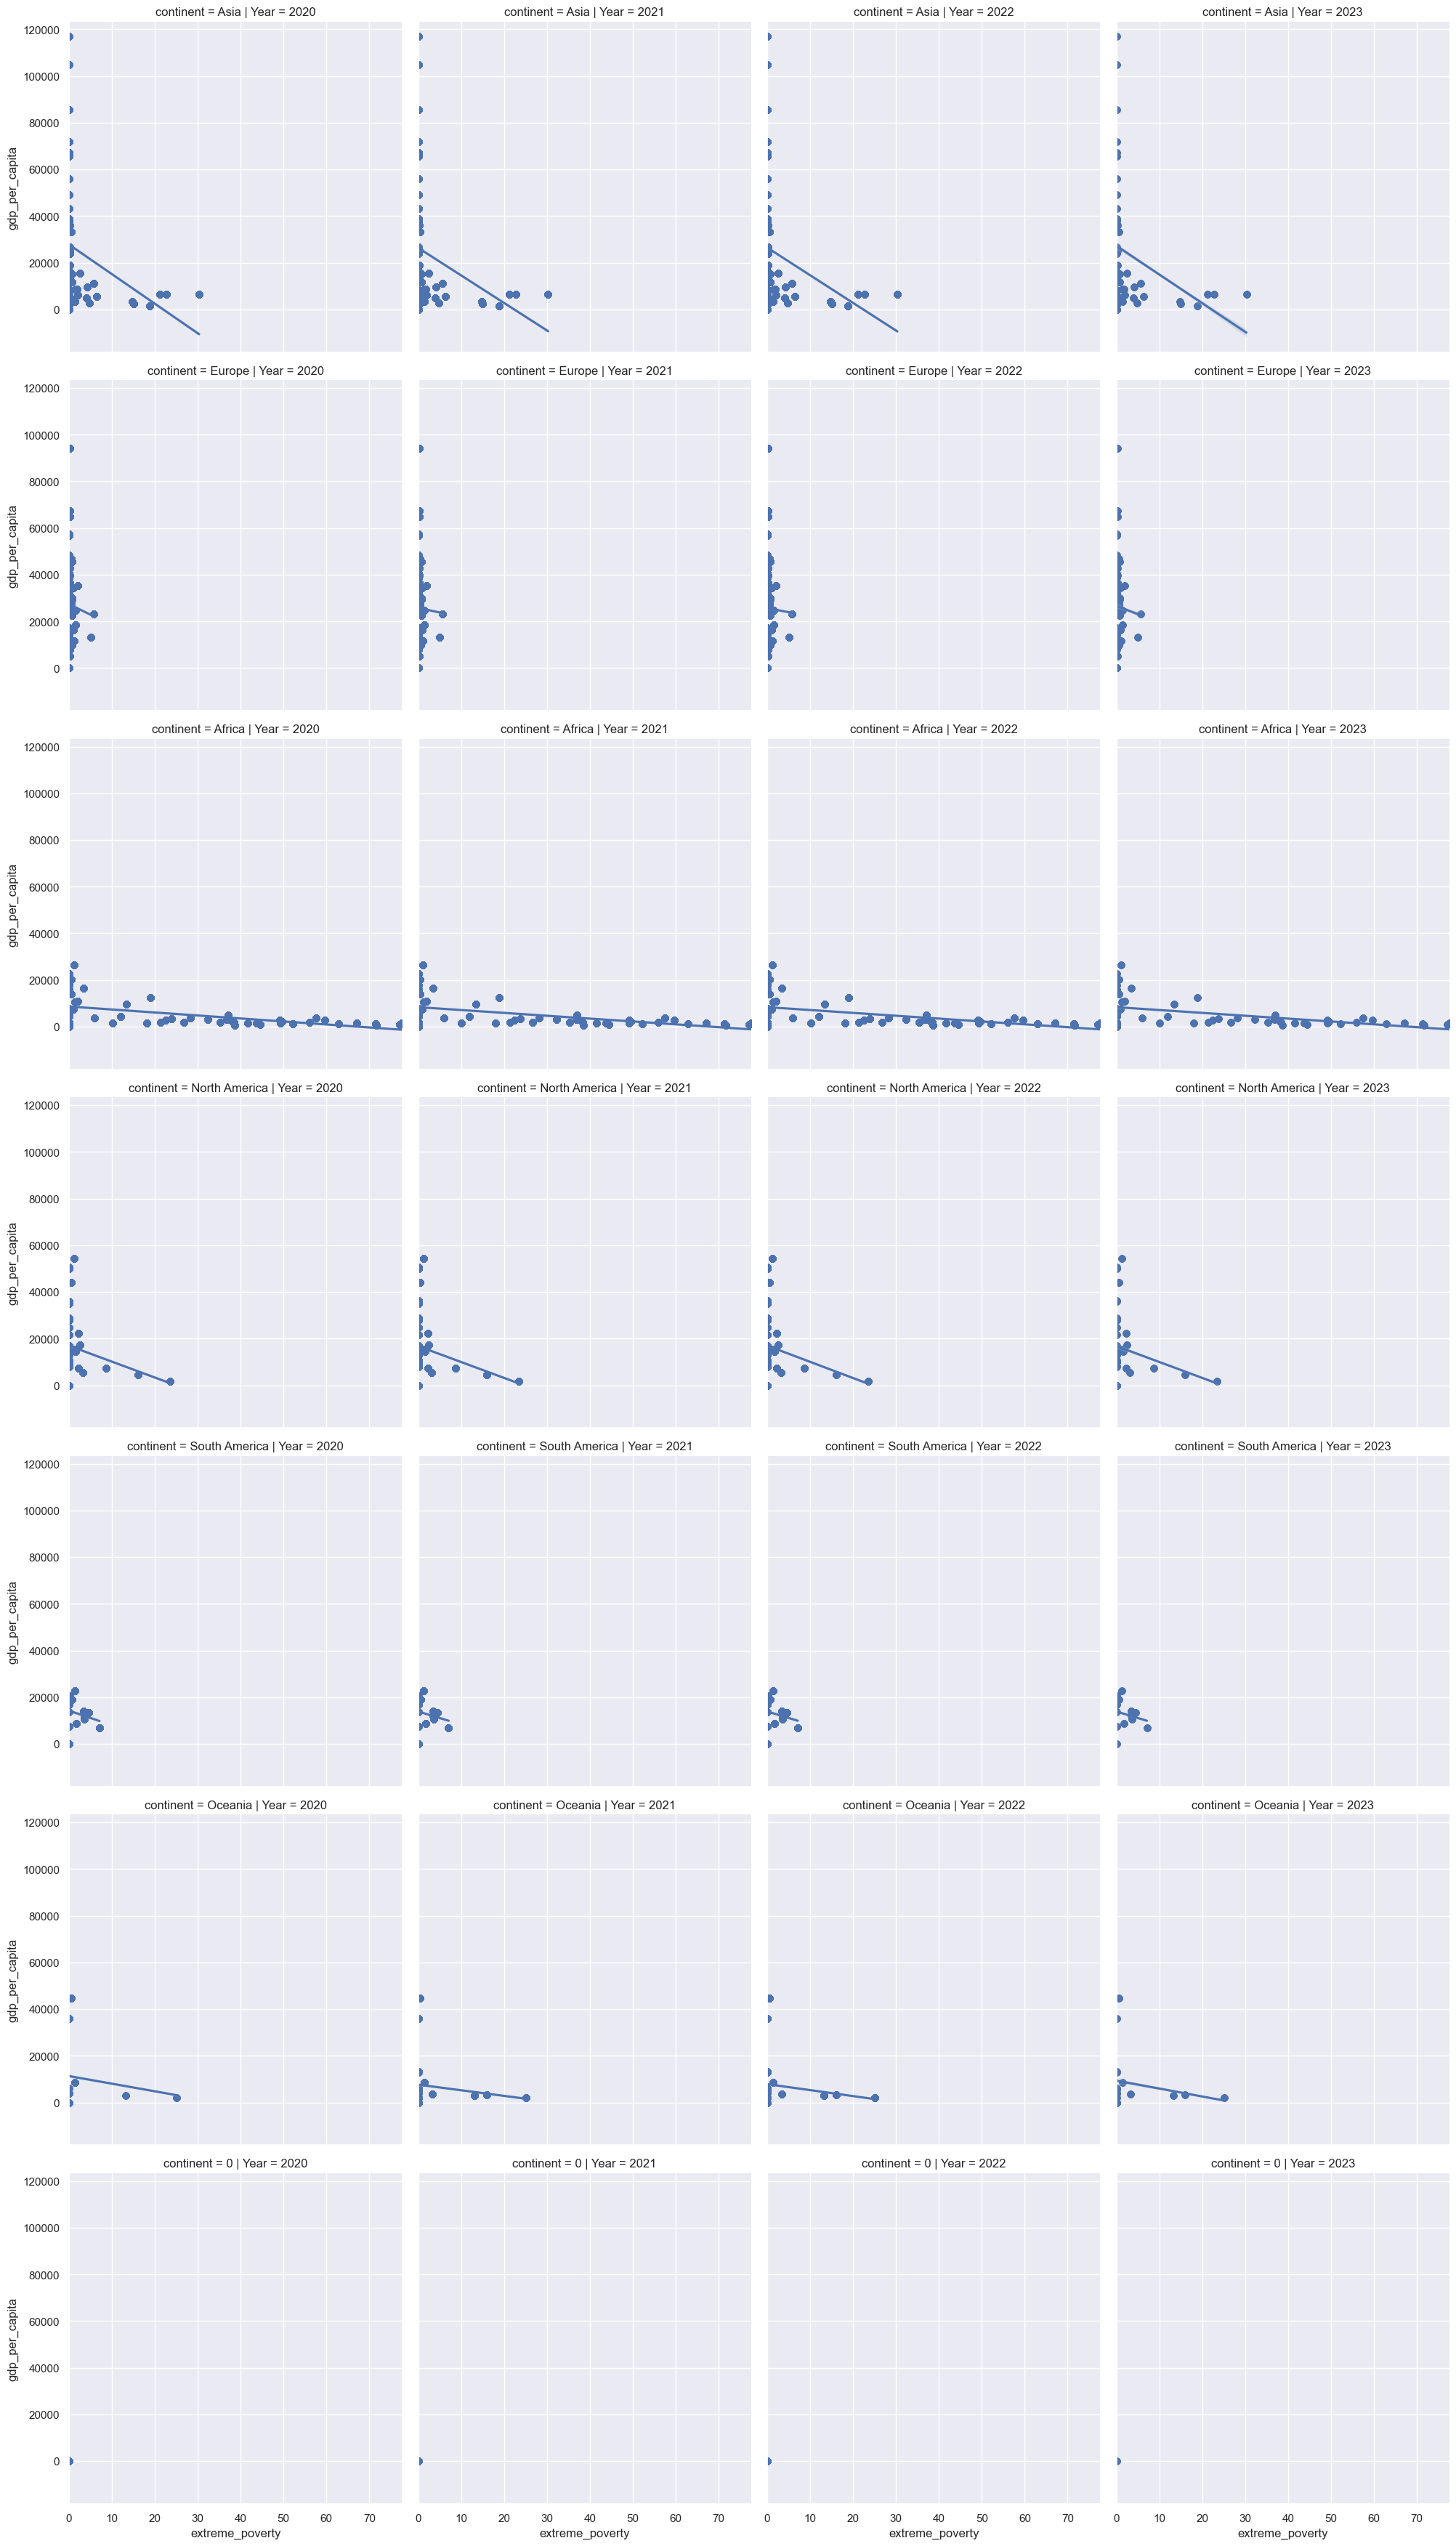

In [394]:
sns.lmplot(x="extreme_poverty", y="gdp_per_capita", col="Year", row='continent', data=df_ref)

In [291]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [226]:


values_to_drop = ['Africa', 'Asia','Europe','European Union','High income','Low income','Lower middle income','North America','Oceania','South America','Upper middle income','World']

In [227]:

# drop rows containing the values in the list
df = df[~df['location'].isin(values_to_drop)]

In [231]:
df.location.nunique()

236

In [342]:
lets_map = df[['iso_code','location','total_deaths_per_million']]

In [343]:
lets_map

,iso_code,location,total_deaths_per_million
0,AFG,Afghanistan,0.000
1,AFG,Afghanistan,0.000
2,AFG,Afghanistan,0.000
3,AFG,Afghanistan,0.000
4,AFG,Afghanistan,0.000
...,...,...,...
259632,ZWE,Zimbabwe,346.925
259633,ZWE,Zimbabwe,346.925
259634,ZWE,Zimbabwe,346.925
259635,ZWE,Zimbabwe,346.986


In [356]:
grouped_df = lets_map.groupby(['iso_code', 'location']).mean()

In [365]:
world_map = grouped_df.reset_index()

In [366]:
world_map

,iso_code,location,total_deaths_per_million
0,ABW,Aruba,1253.908082
1,AFG,Afghanistan,117.817841
2,AGO,Angola,31.608276
3,AIA,Anguilla,266.868107
4,ALB,Albania,782.372578
...,...,...,...
231,WSM,Samoa,47.442575
232,YEM,Yemen,41.977390
233,ZAF,South Africa,1043.995444
234,ZMB,Zambia,119.881655


In [374]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [375]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [364]:
 init_notebook_mode(connected=True) 

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [370]:
data = dict(
        type = 'choropleth',
        locations = world_map['iso_code'],
        z = world_map['total_deaths_per_million'],
        text = world_map['location'],
        colorbar = {'title' : 'Total Deaths Per Million'},
      ) 

In [378]:
layout = dict(
    title = 'Total Covid Deaths ',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [379]:
choromap = go.Figure(data = [data],layout = layout)


In [380]:
iplot(choromap)